In [61]:
import warnings
# warnings.filterwarnings('ignore') TODO disable warn
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helpers.json_helper import load_tokenized_text
from helpers.categories import get_categories_dict

gb = pd.read_csv(os.path.join("categories_data", "GB_videos_5p.csv"), sep=";", index_col=0)
us = pd.read_csv(os.path.join("categories_data", "US_videos_5p.csv"), sep=";", index_col=0)

gb_images = pd.read_csv(os.path.join("images_data", "GB_images_data.csv"), sep=";", index_col=0).reset_index(drop=True)
us_images = pd.read_csv(os.path.join("images_data", "US_images_data.csv"), sep=";", index_col=0).reset_index(drop=True)

## Wczytanie danych tekstowych

Poniższy kod wczytuje dane, które zostały poddane procesowi tokenizacji a następnie grupowania
po wygenerowanym id w poprzednich etapach.

In [34]:
data_frames = [gb, us]
countries = ["GB", "US"]
tokenized_attrs = ["channel_titles", "descriptions", "ocr_text", "titles", "domains"]

for attr in tokenized_attrs:
    for df, c in zip(data_frames, countries):
        tokenized = load_tokenized_text(os.path.join("tokenized", f"{c}_grouped_{attr}.json"))
        df[f"tokenized_{attr}"] = tokenized
        df[f"tokenized_{attr}"] = df[f"tokenized_{attr}"].apply(lambda x: x[-1] if x else [])

## Wczytanie danych emocji TODO

## Połączenie zbiorów z obu krajów

In [35]:
videos = pd.concat([gb, us])
videos.columns

Index(['new_video_id', 'Unnamed: 0.1', 'video_id', 'trending_date', 'title',
       'channel_title', 'category_id', 'publish_time', 'tags', 'views',
       'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'movie_domains_count', 'description_len', 'title_len',
       'channel_title_len', 'trending_date_day_of_week',
       'publish_time_day_of_week', 'publish_time_hour_of_day', 'count',
       'new_category_id', 'tokenized_channel_titles', 'tokenized_descriptions',
       'tokenized_ocr_text', 'tokenized_titles', 'tokenized_domains'],
      dtype='object')

## Przygotowanie danych o kategoriach

In [36]:
categories_ids = pd.unique(videos["category_id"])

categories_dict = get_categories_dict()
categories = [categories_dict[x] for x in categories_ids if not np.isnan(x)]
videos["category_name"] = videos["category_id"].apply(lambda x: np.nan if np.isnan(x) else categories_dict[x])
print(categories_ids)
print(categories)

[24. nan 10. 22. 26. 25. 23. 17. 19. 20. 27. 15. 28.  1.  2. 29. 43.]
['Entertainment', 'Music', 'People & Blogs', 'Howto & Style', 'News & Politics', 'Comedy', 'Sports', 'Travel & Events', 'Gaming', 'Education', 'Pets & Animals', 'Science & Technology', 'Film & Animation', 'Autos & Vehicles', 'Nonprofits & Activism', 'Shows']


Metoda pomocnicza pozwalająca na wizualizację danych dla poszczegołnych kategorii
danego atrybutu tekstowego

In [59]:
def plot_categories_bars(categories, attr, n_frequent=50):
    for cat in categories:
        data = videos[videos["category_name"] == cat]
        words = data[f"tokenized_{attr}"].explode().dropna()
        words_counts = words.value_counts()
        words_counts = words_counts.rename_axis("words").reset_index(name="count")
        print(f"Category '{cat}' Attr: '{attr}' unique words: {len(words_counts)}")
        wh = words_counts.head(n_frequent)
        plt.subplots(figsize=(18, 5))
        plt.bar(wh["words"], wh["count"])
        plt.title(cat)
        plt.xticks(rotation=270, fontsize=15)
        plt.show()

## Tytuł kanału

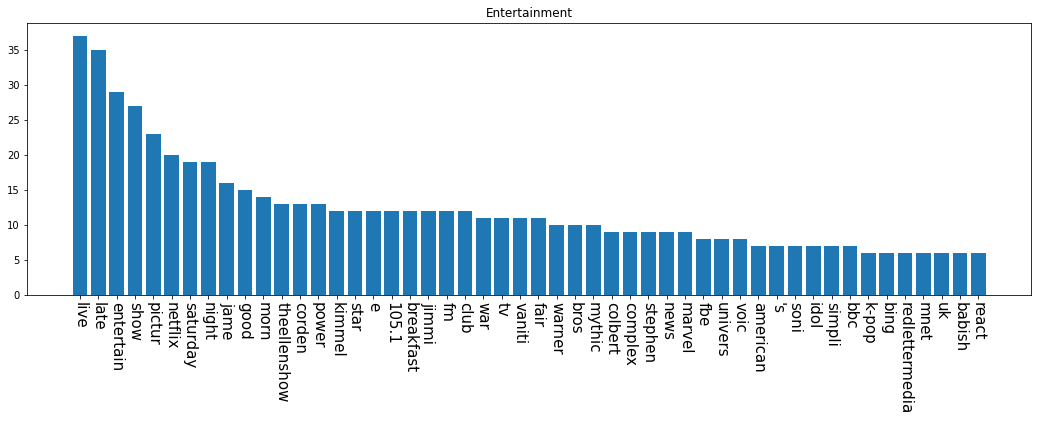

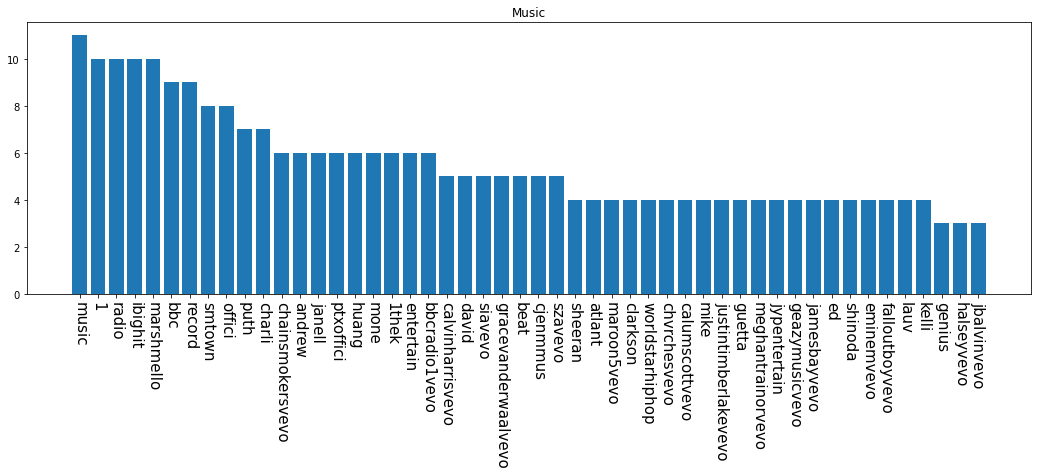

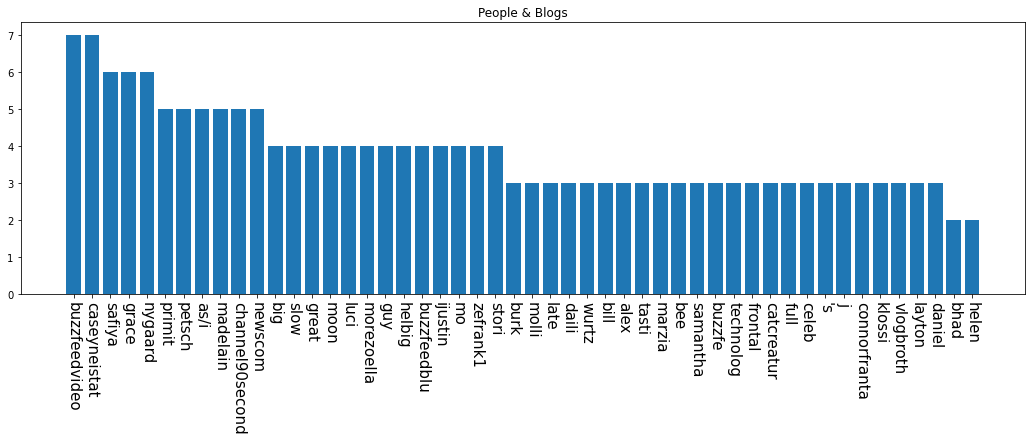

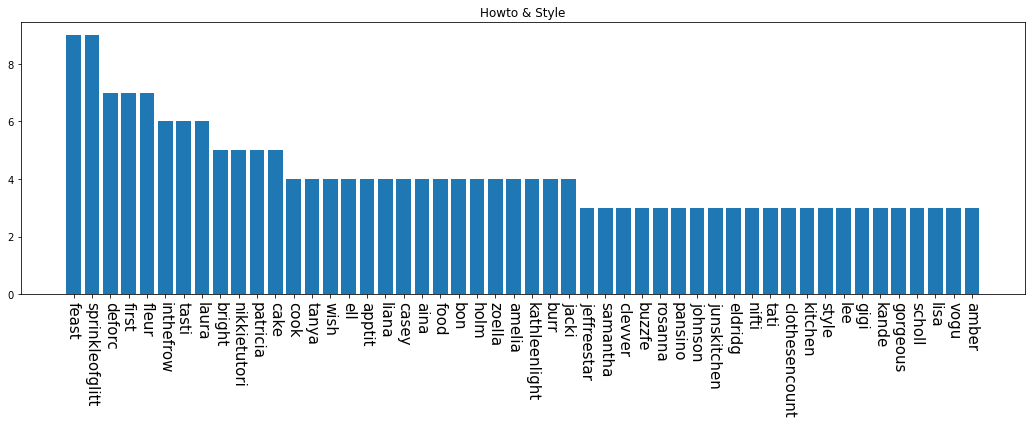

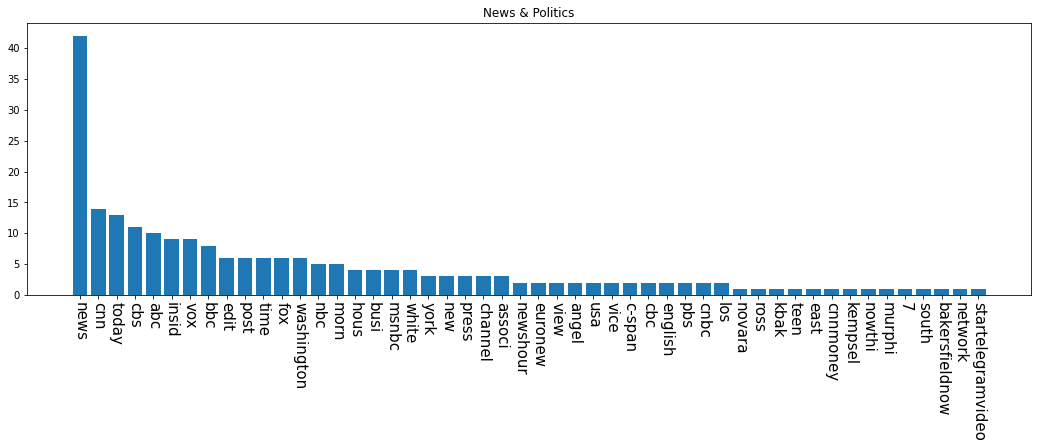

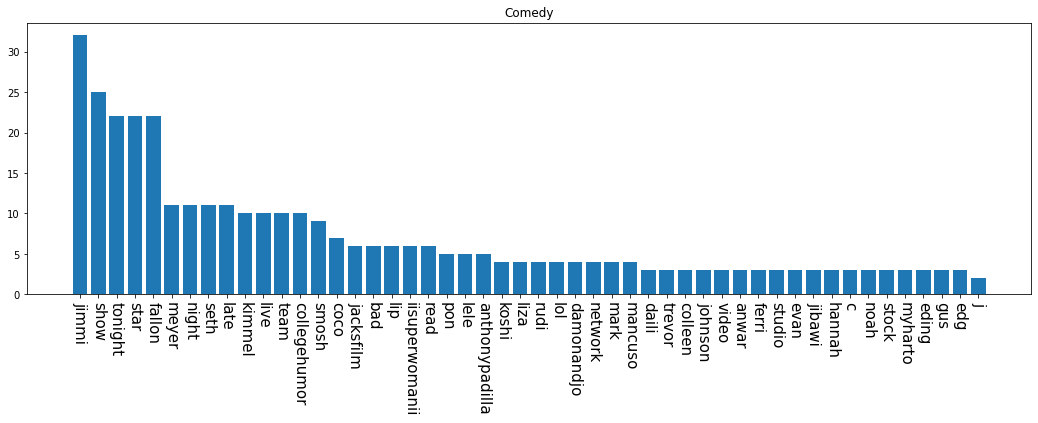

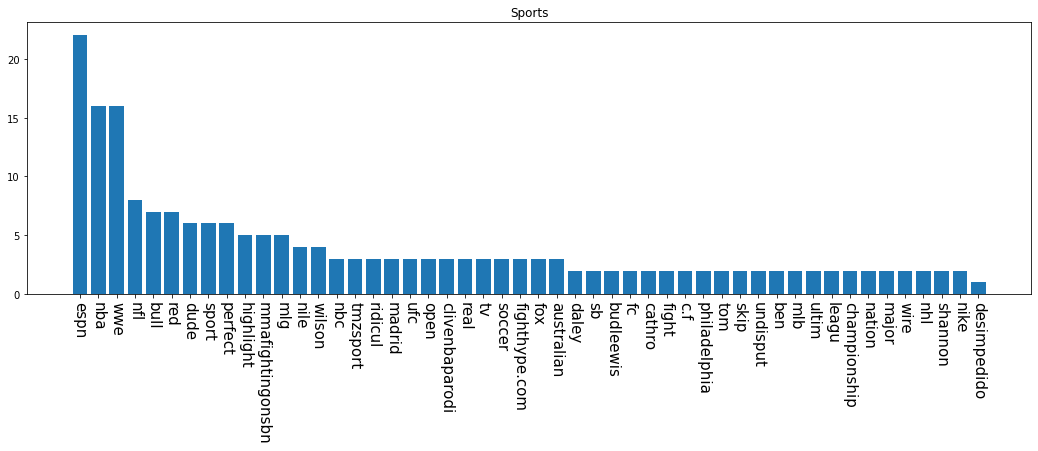

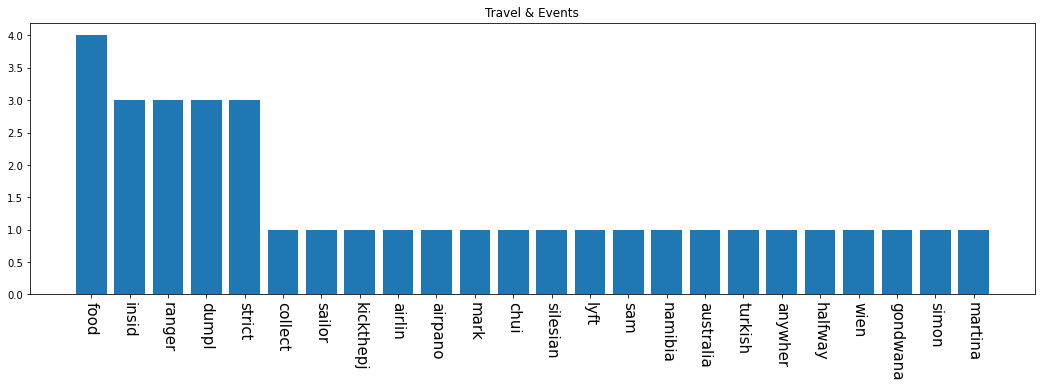

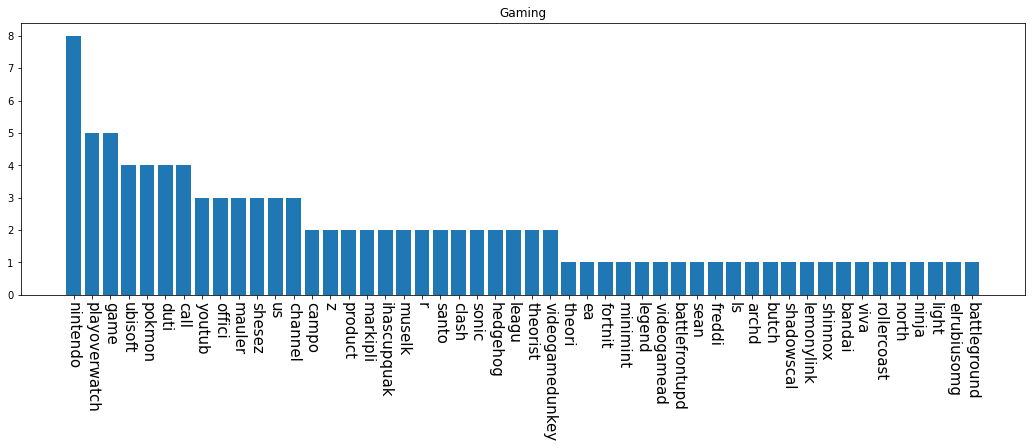

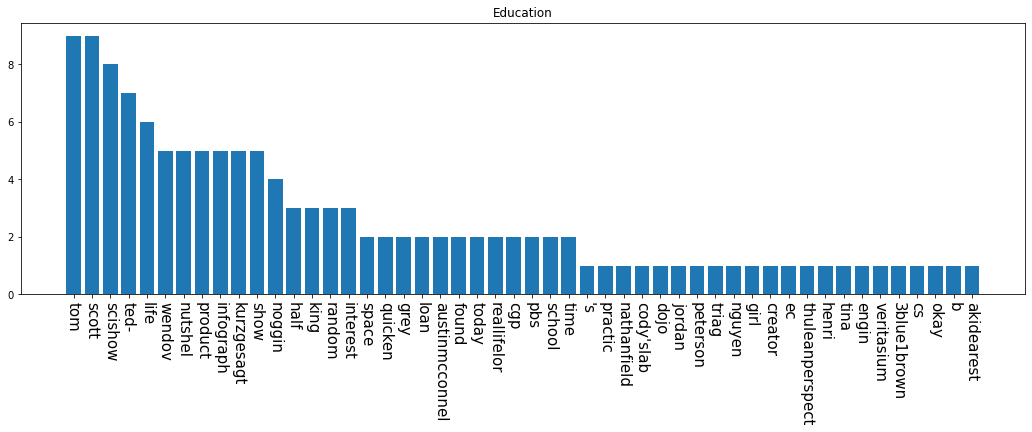

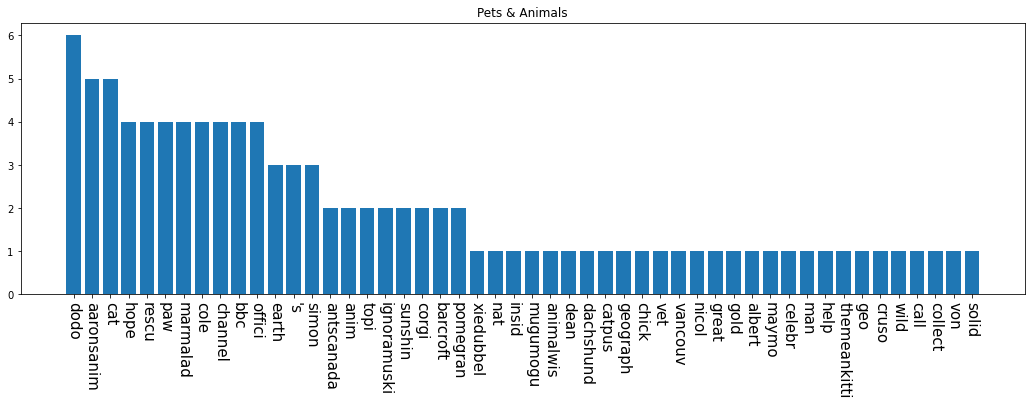

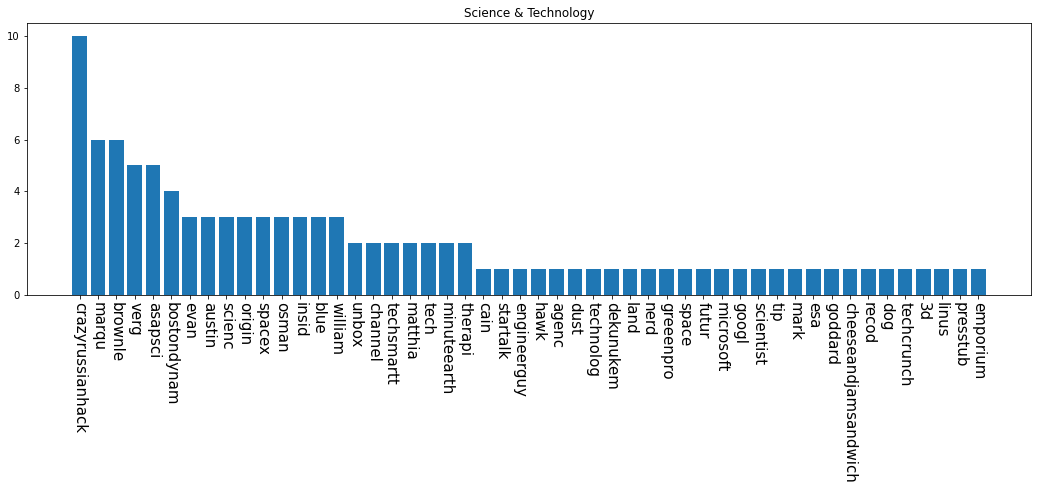

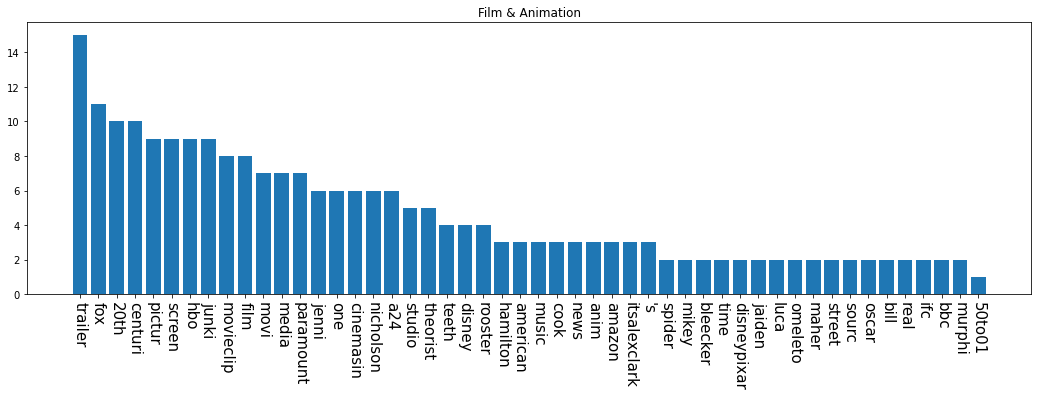

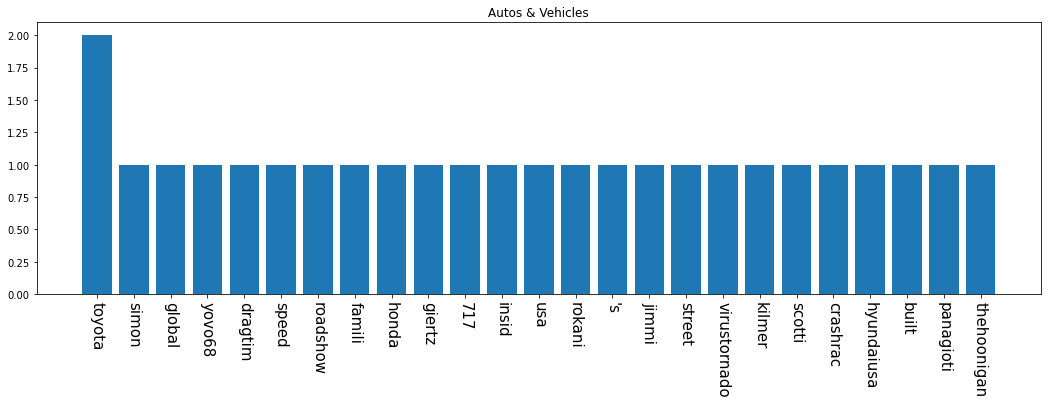

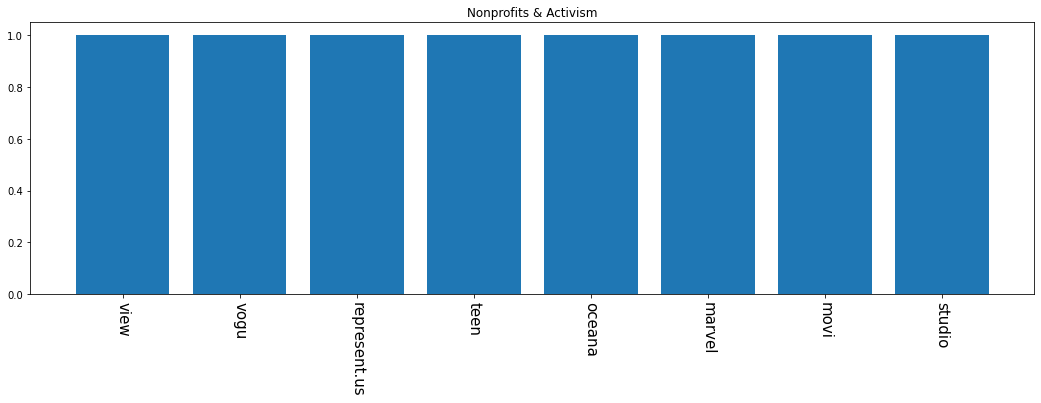

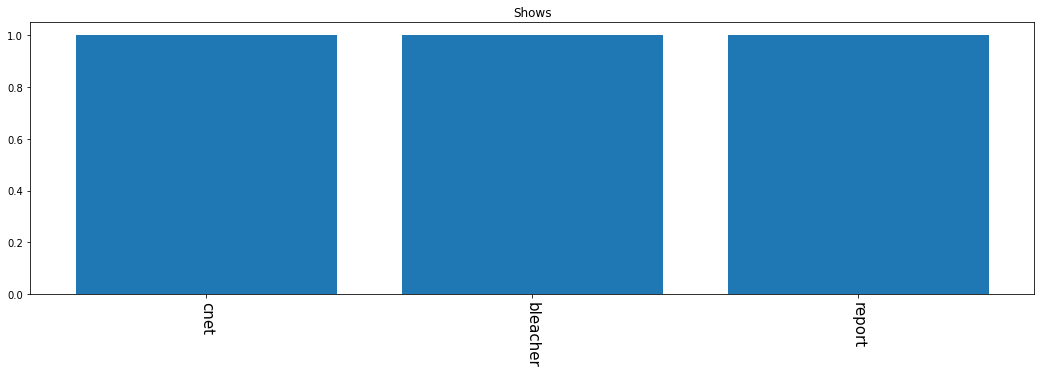

In [38]:
plot_categories_bars(categories, "channel_titles")

## Tytuł filmu

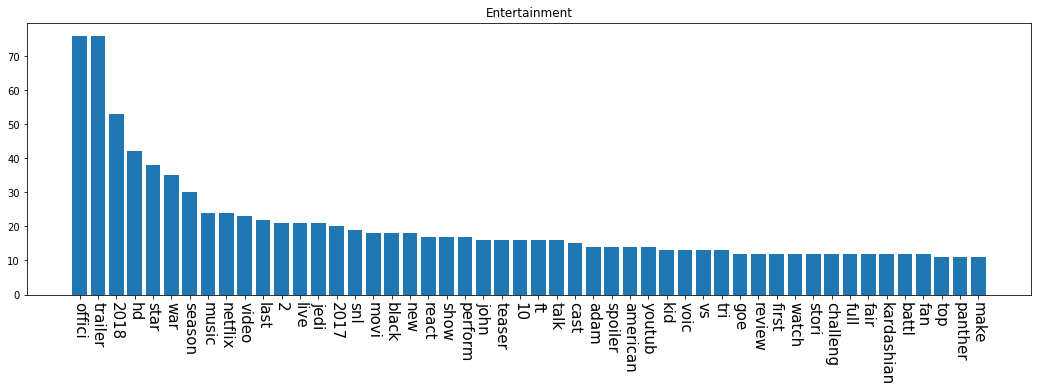

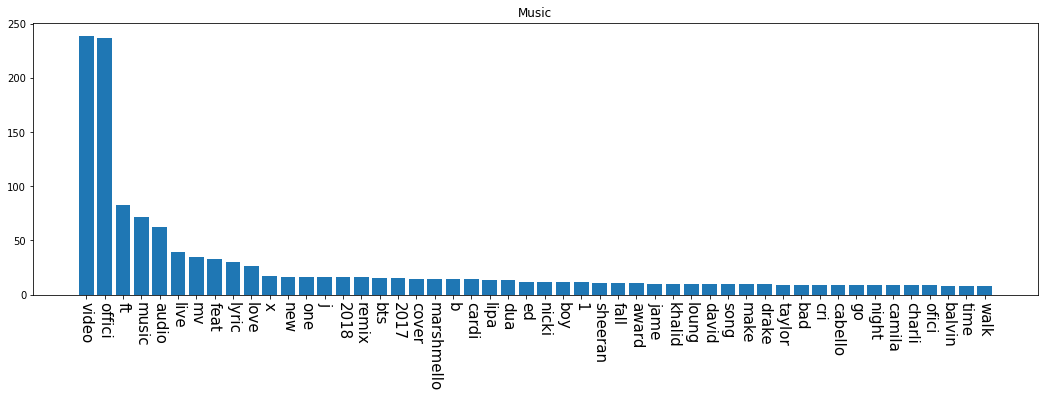

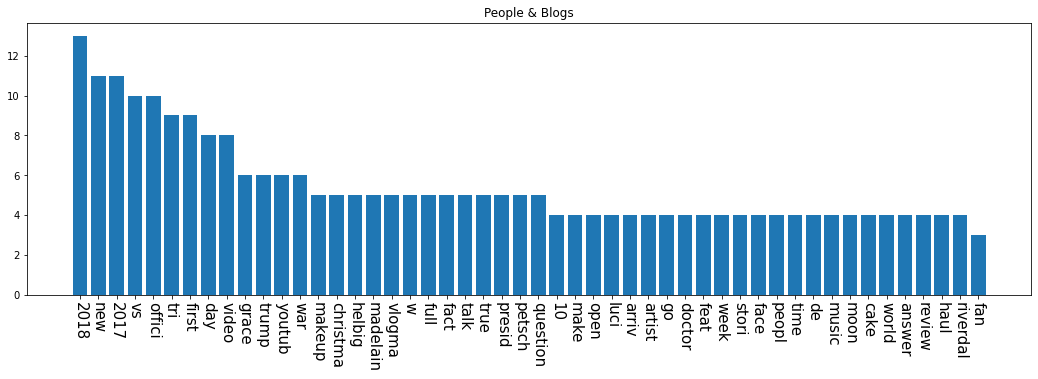

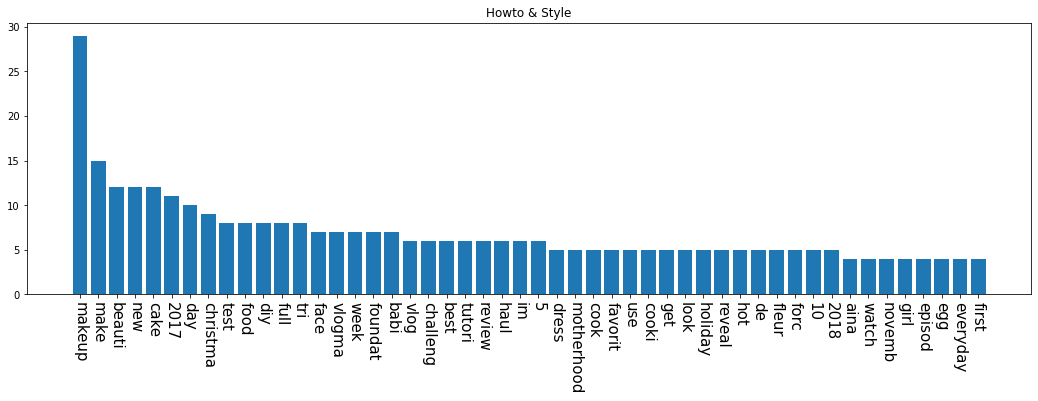

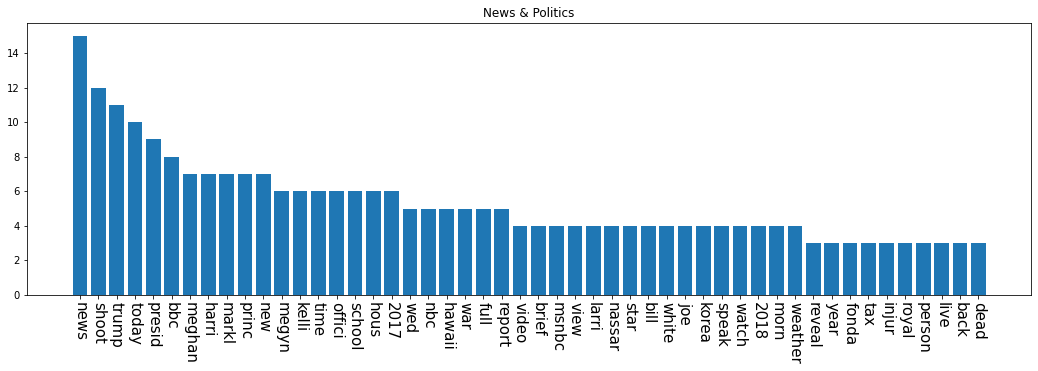

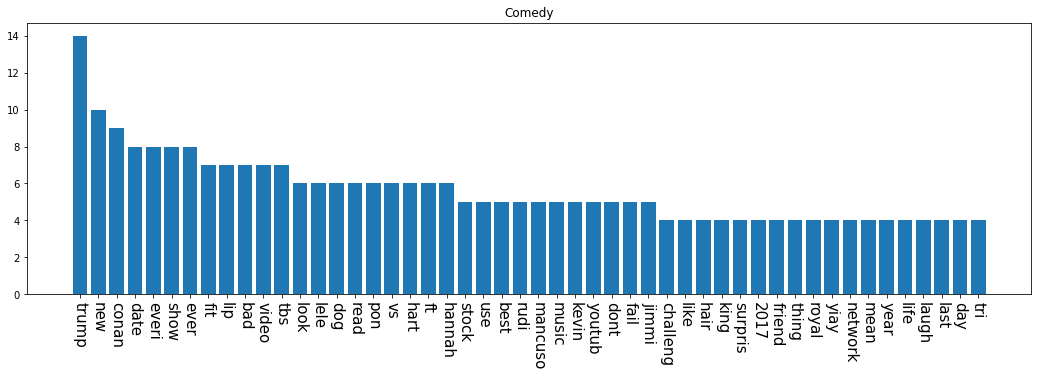

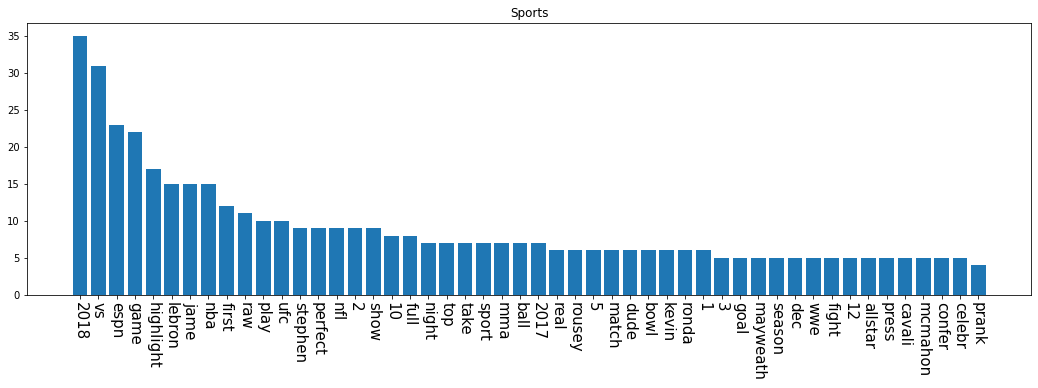

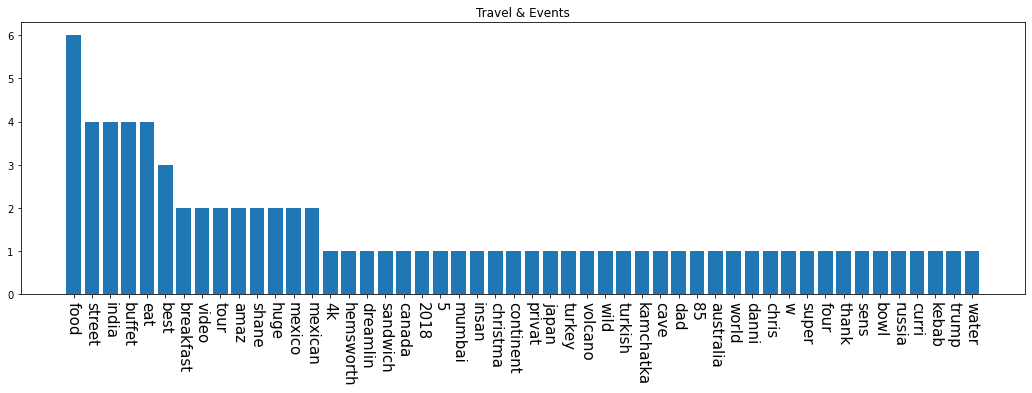

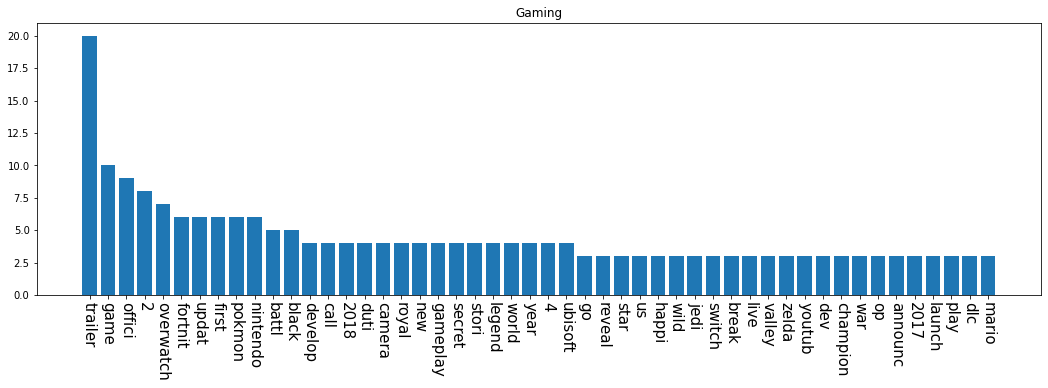

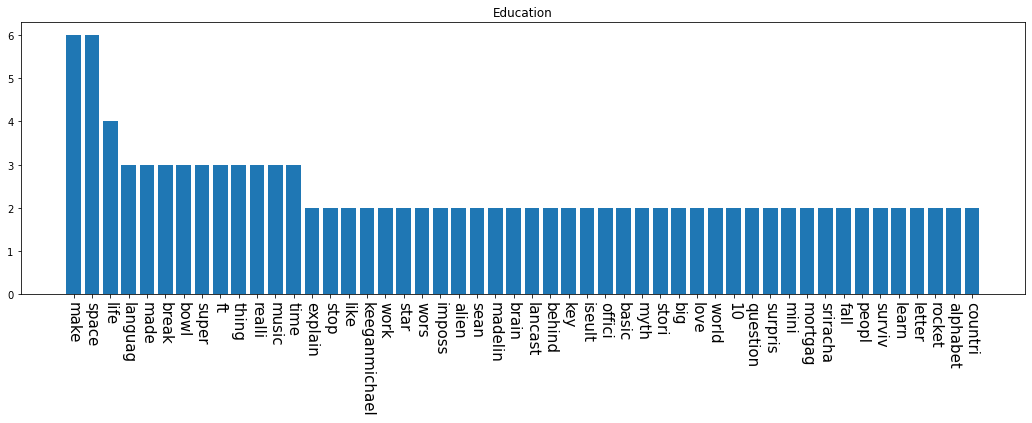

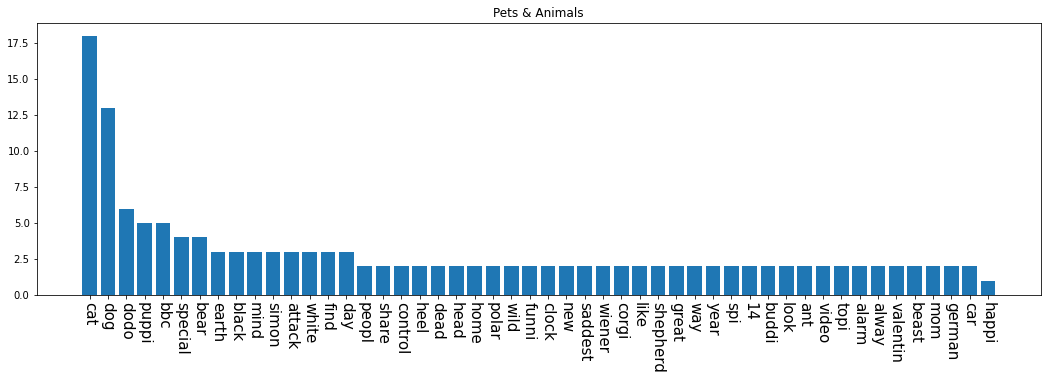

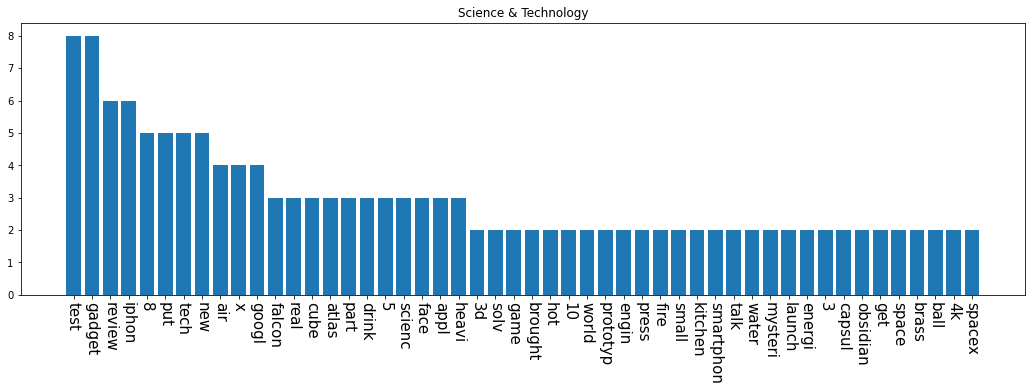

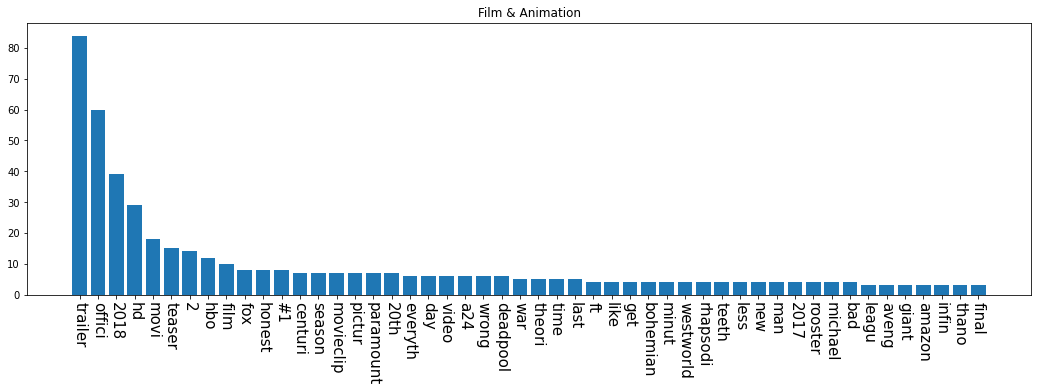

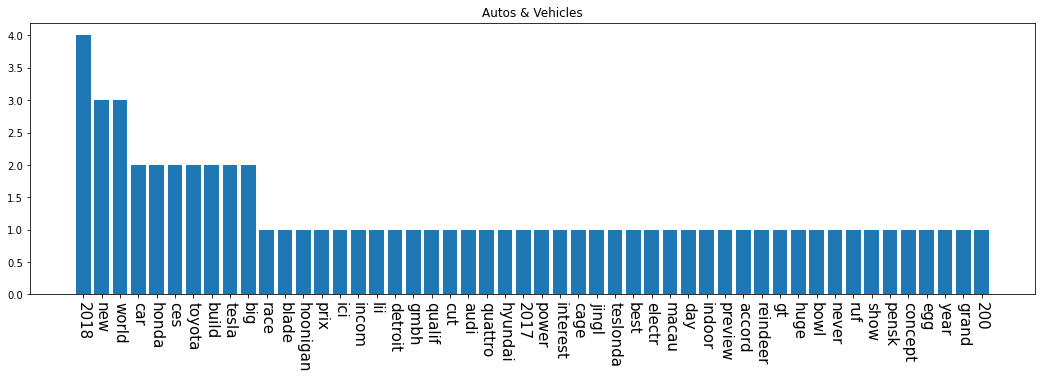

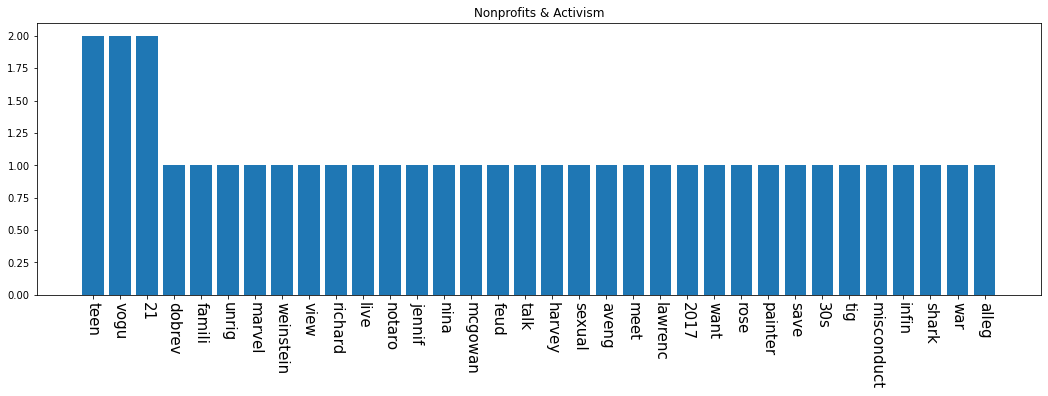

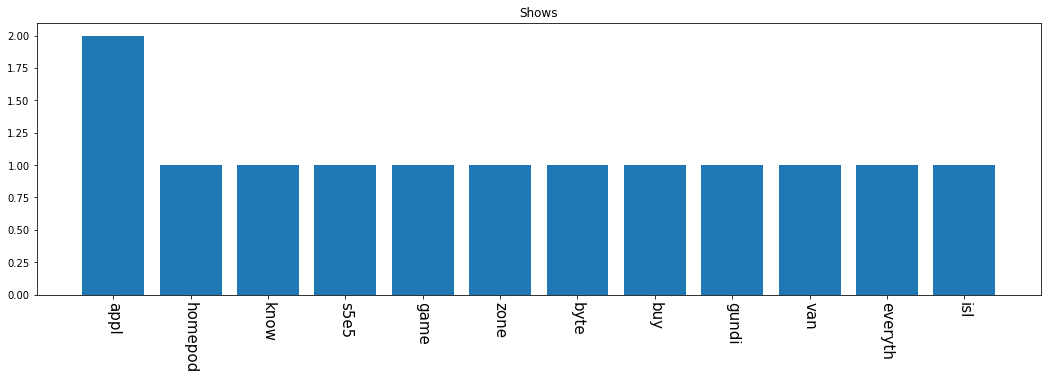

In [39]:
plot_categories_bars(categories, "titles")

## Opisy filmów

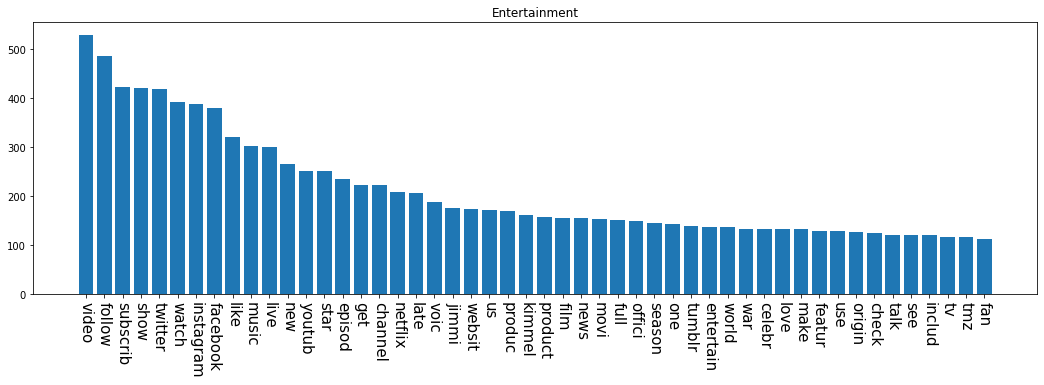

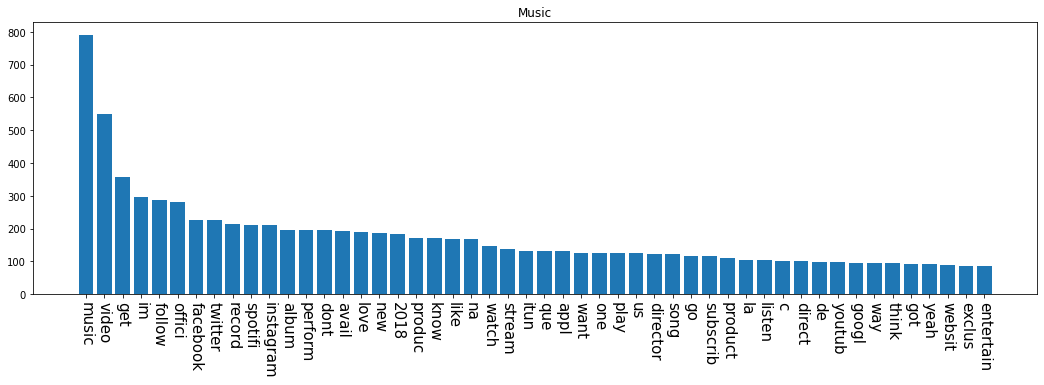

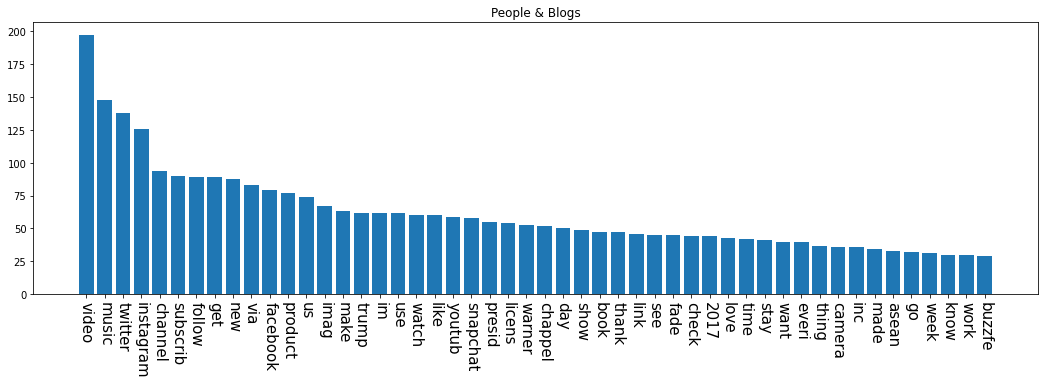

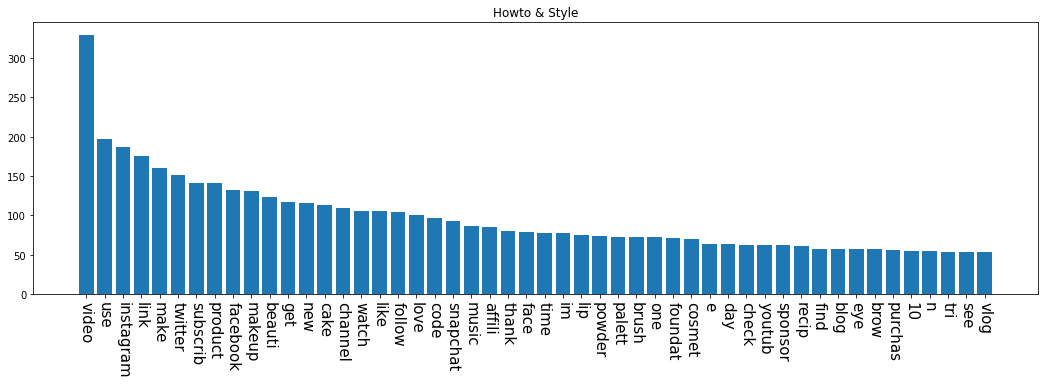

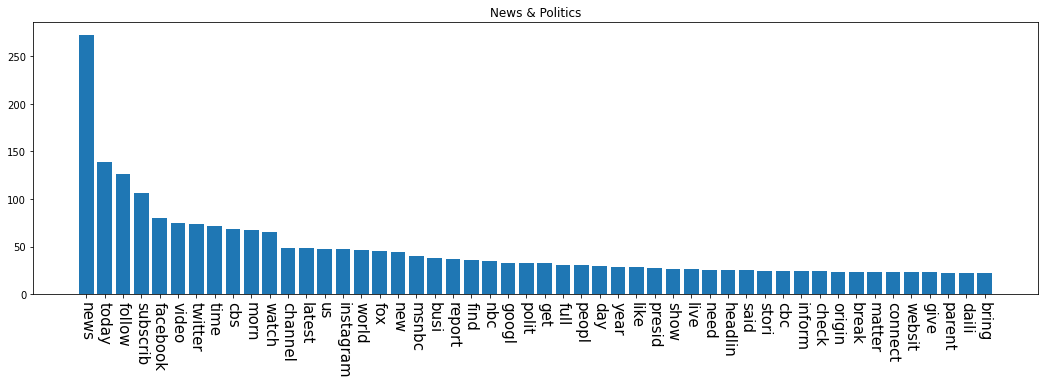

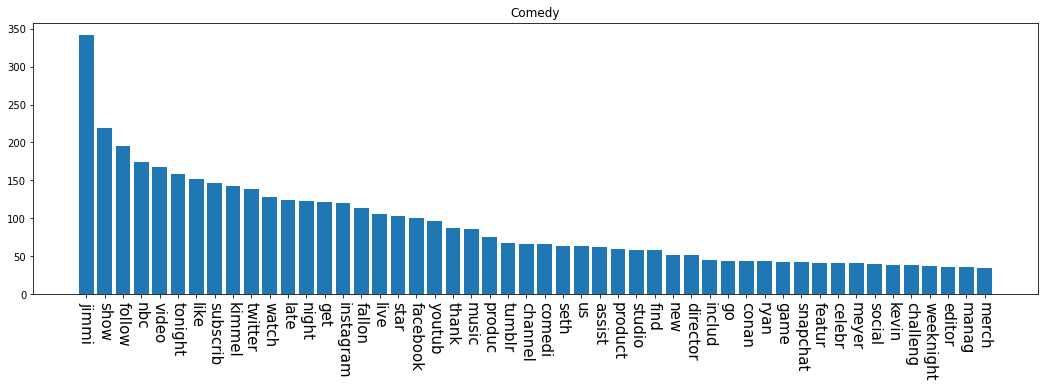

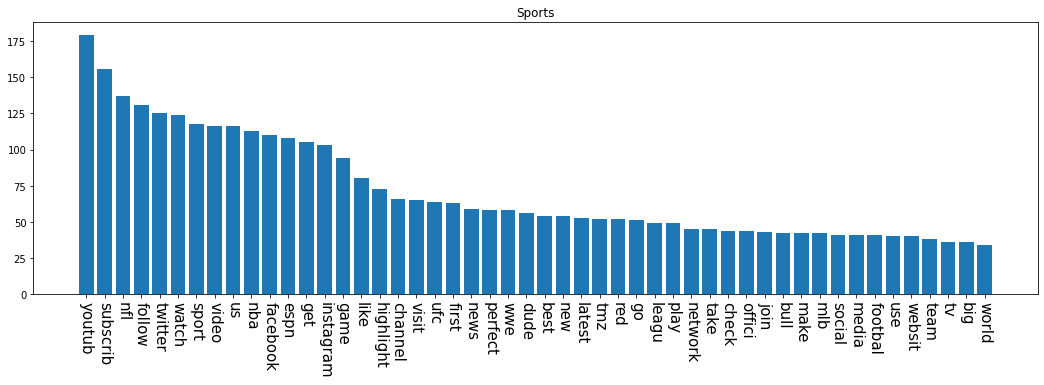

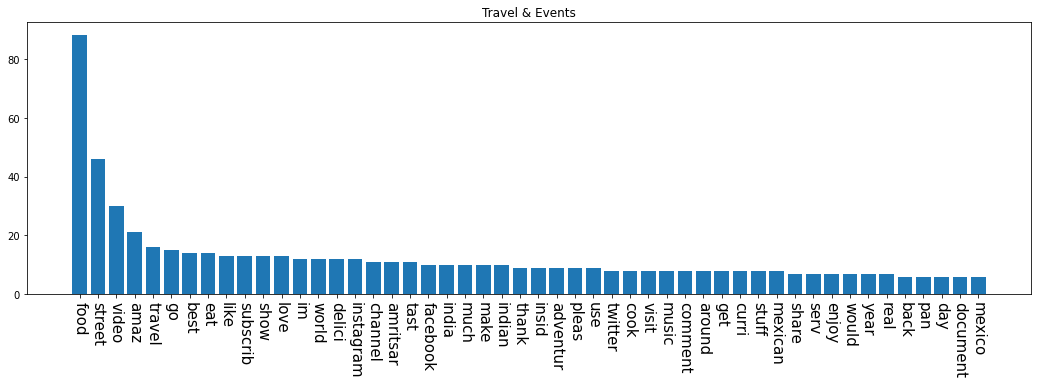

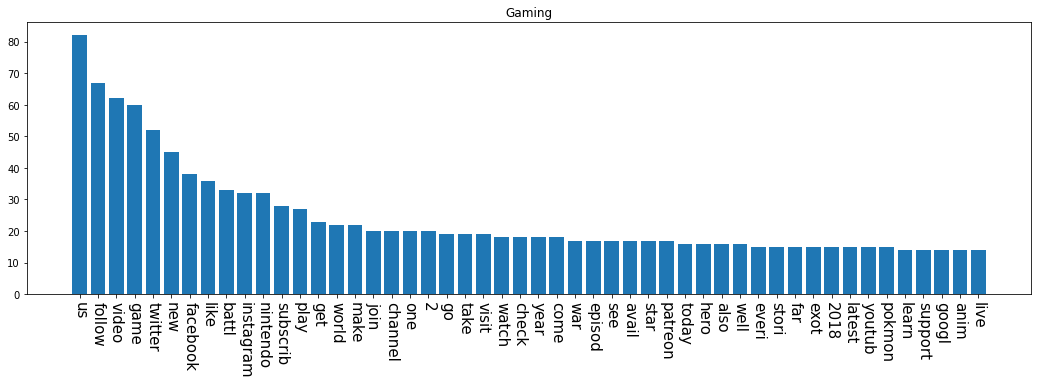

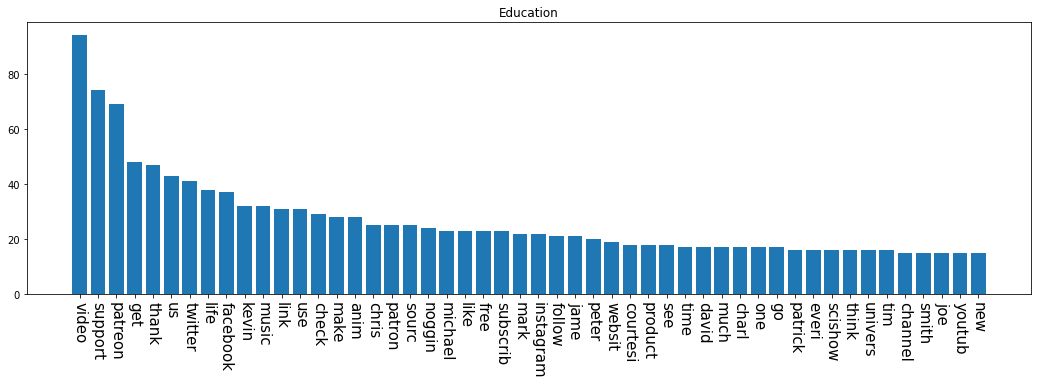

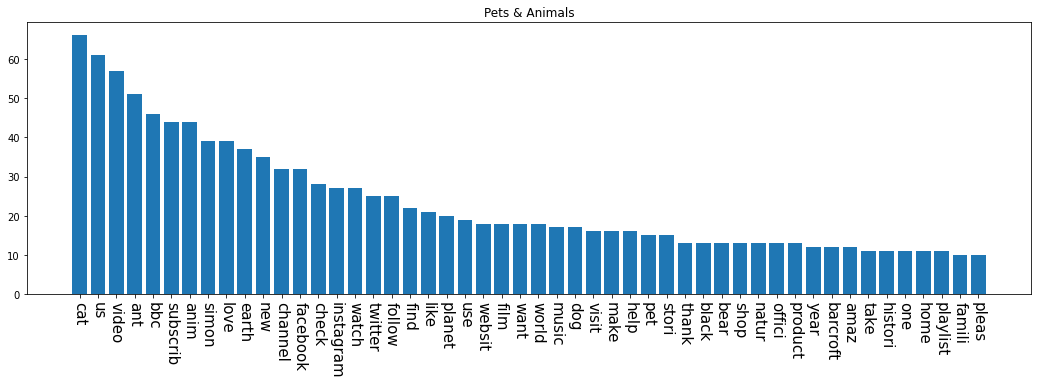

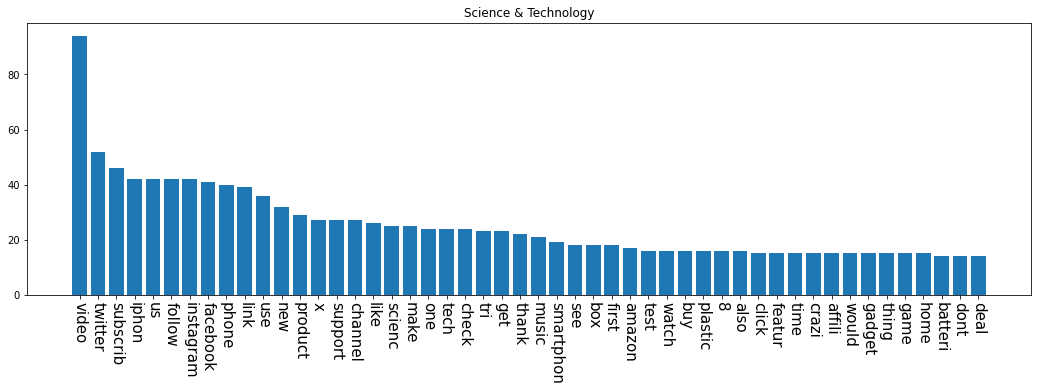

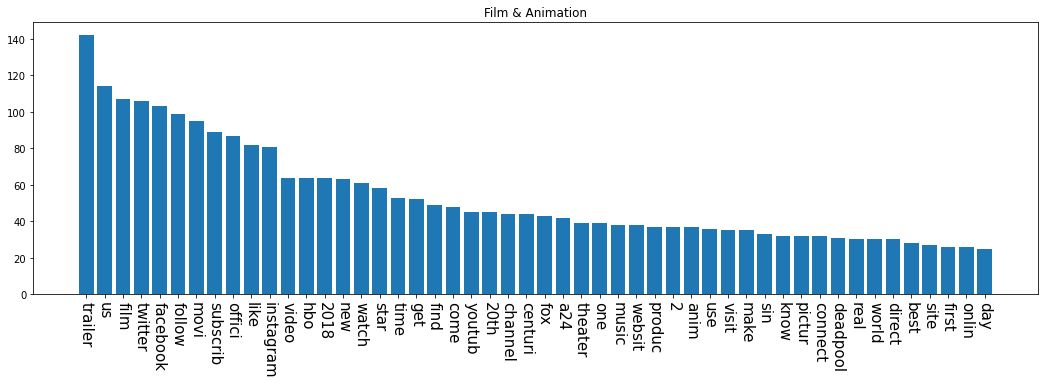

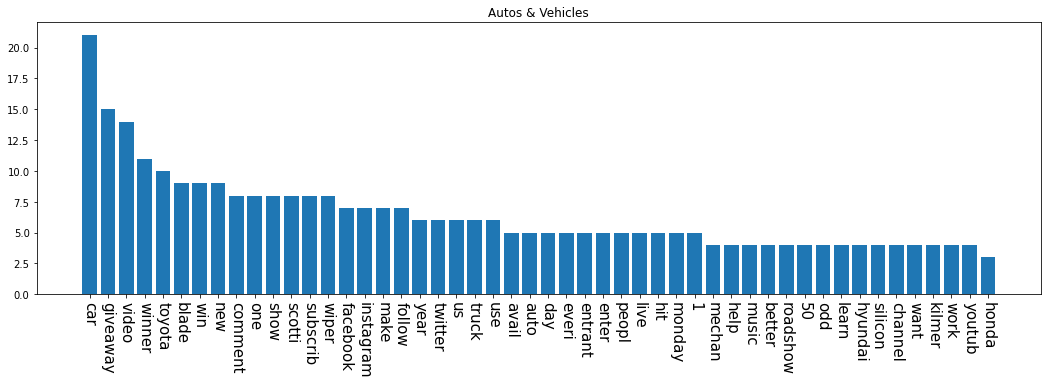

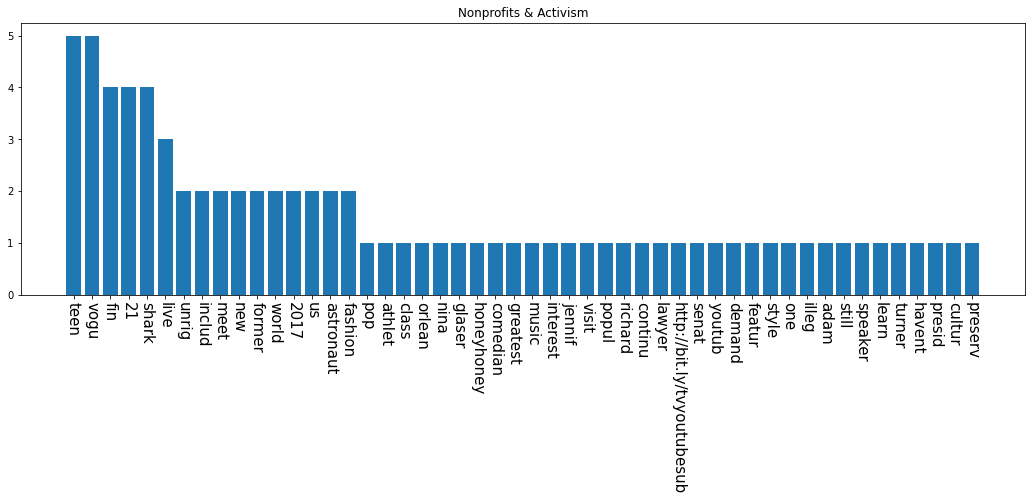

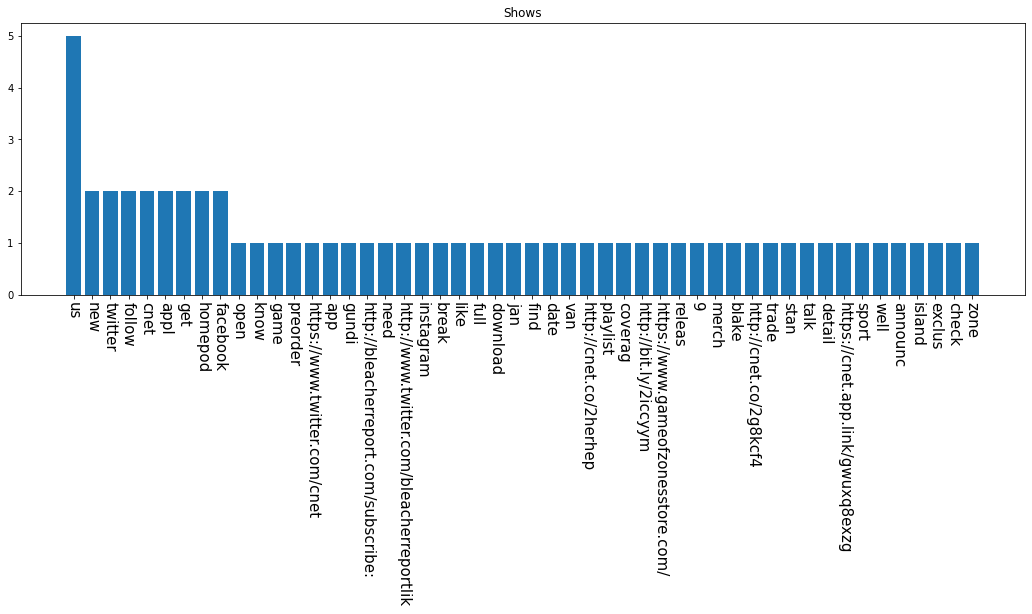

In [40]:
plot_categories_bars(categories, "descriptions")

## OCR

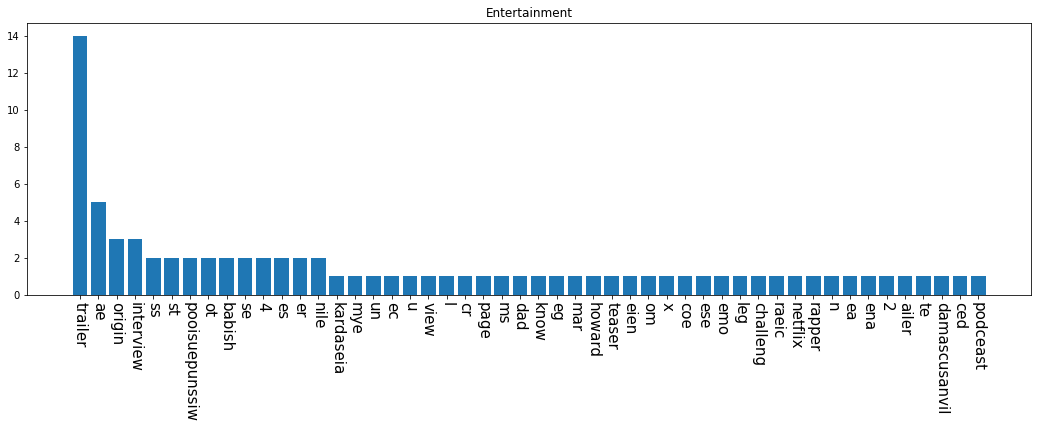

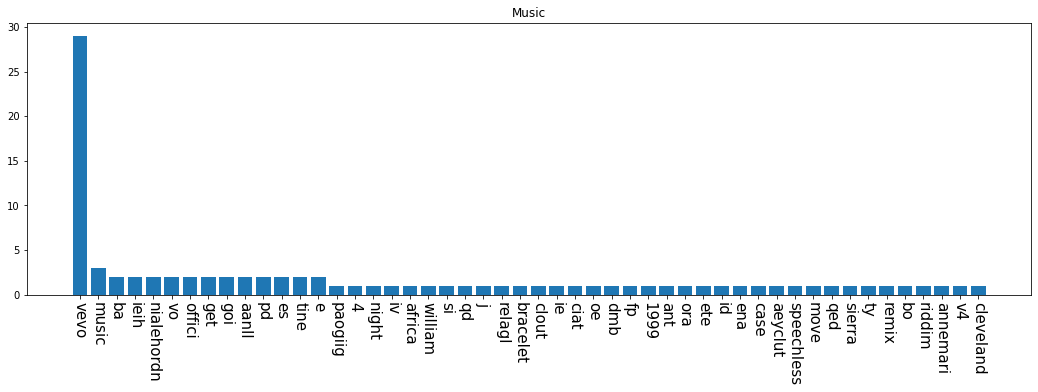

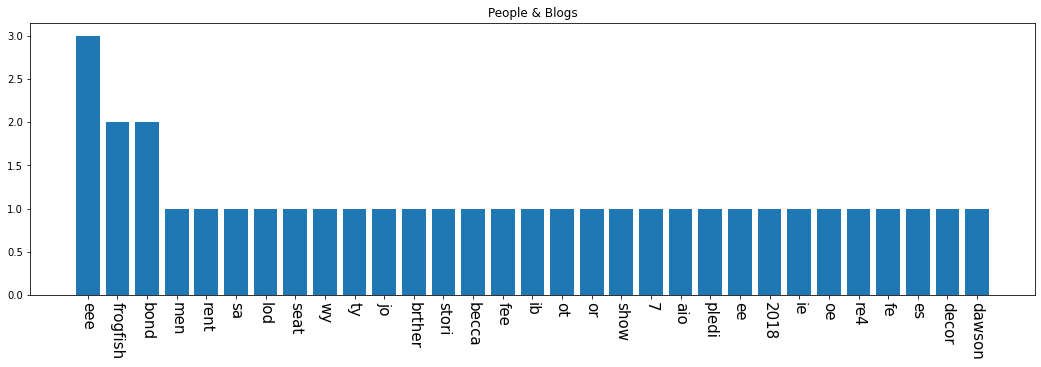

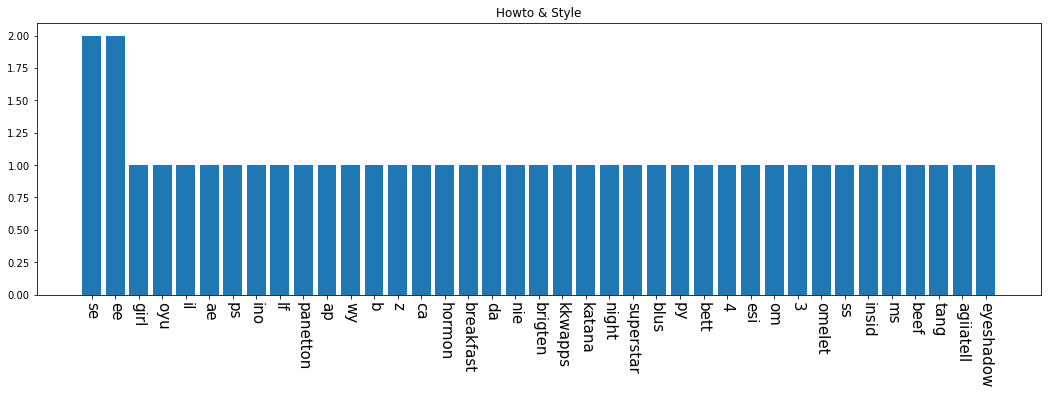

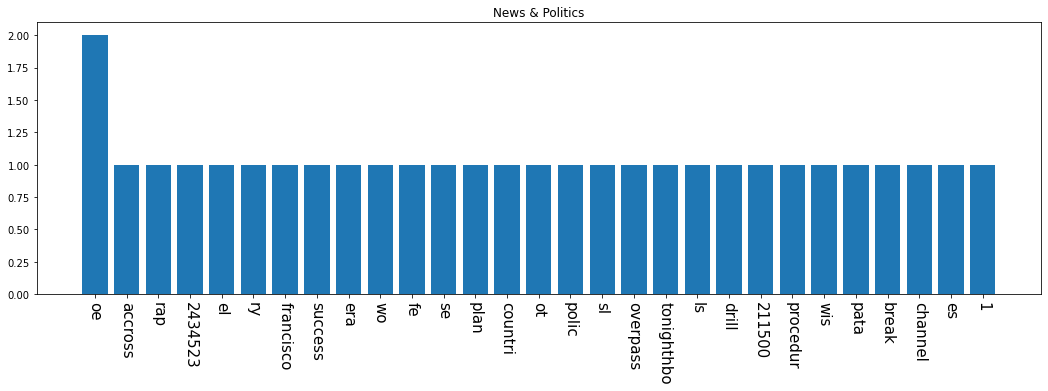

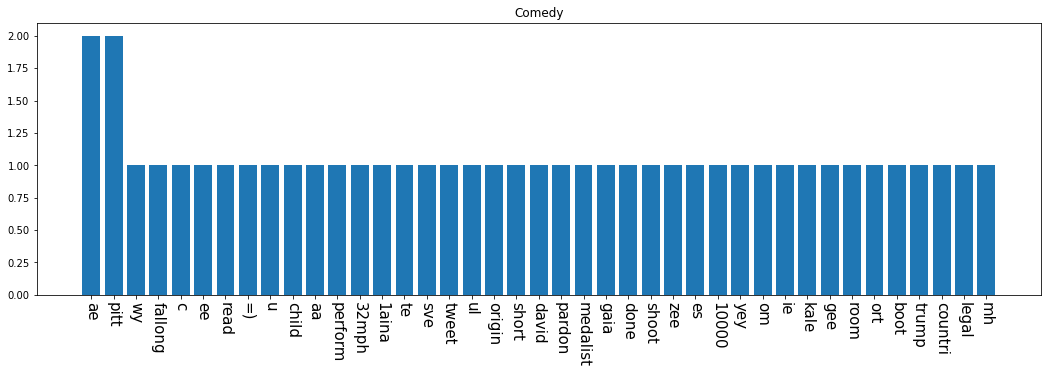

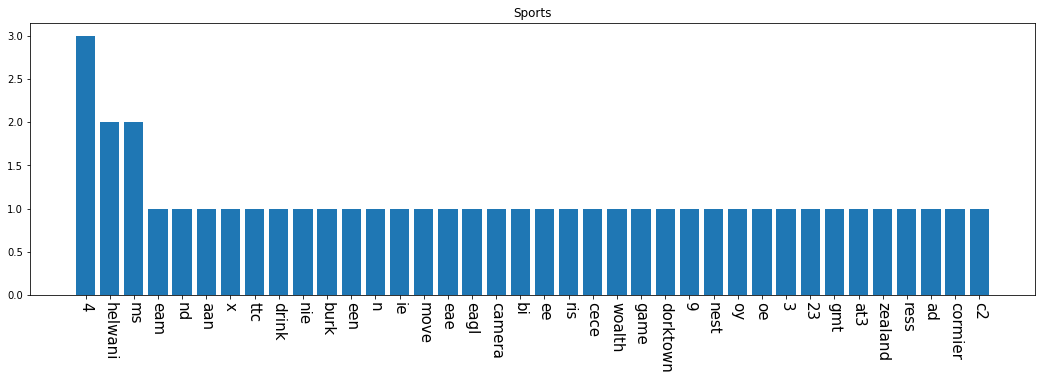

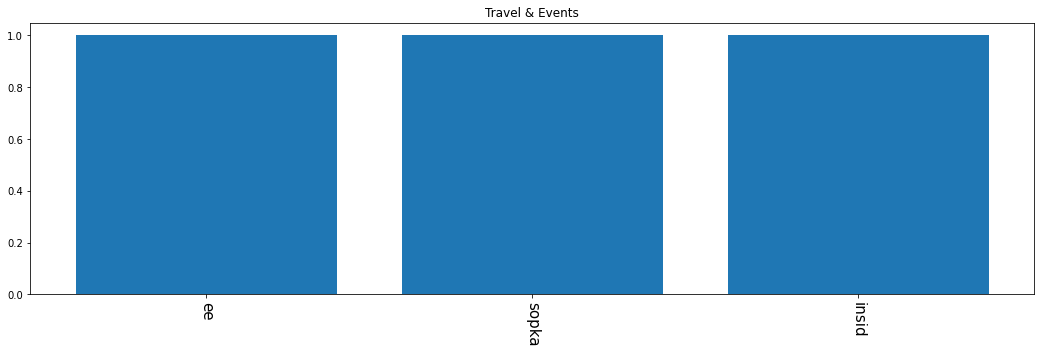

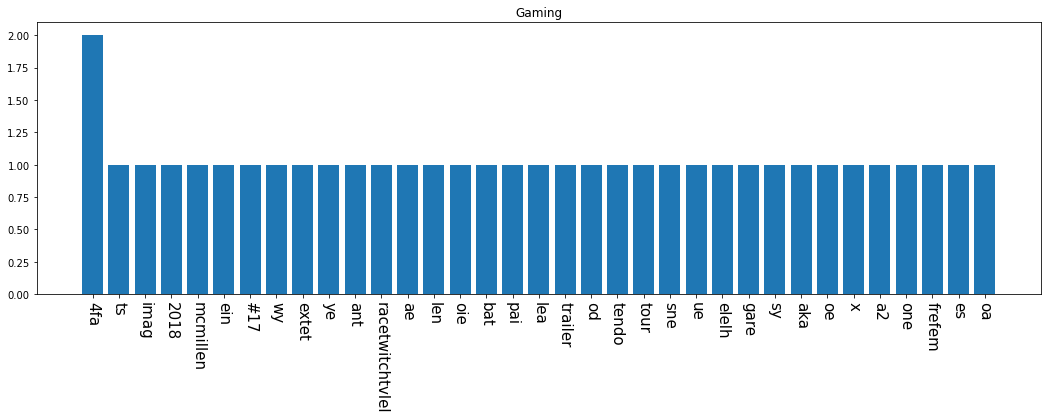

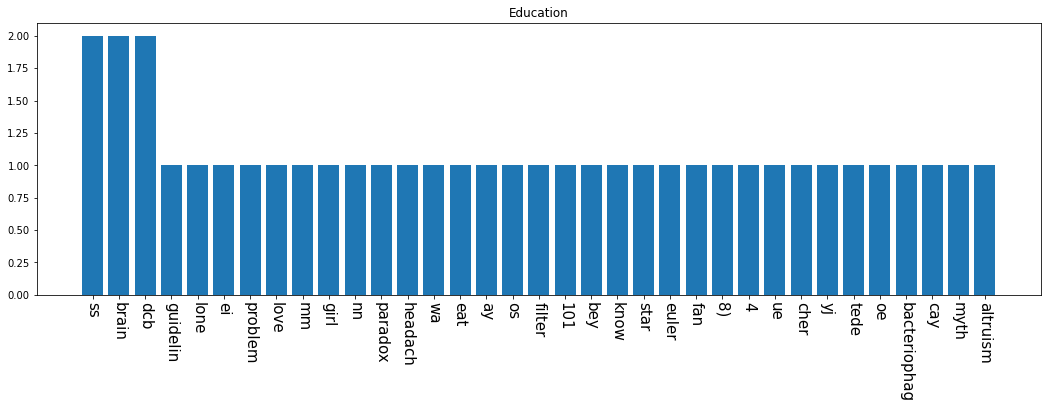

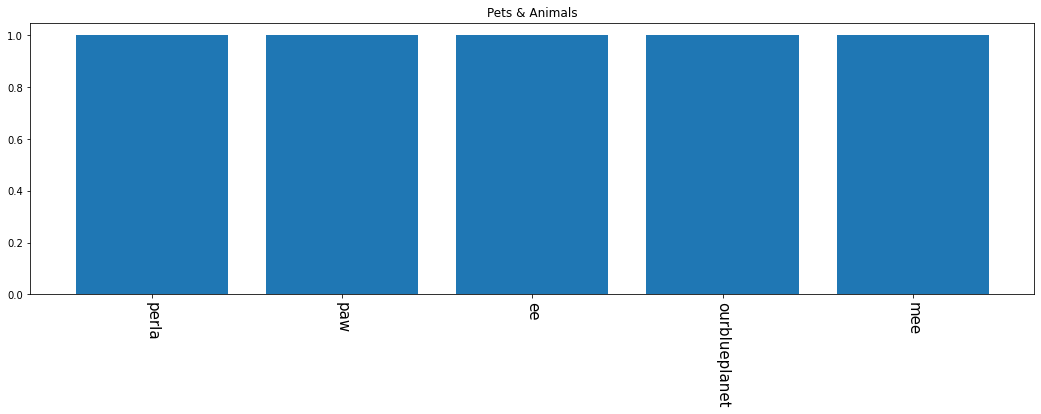

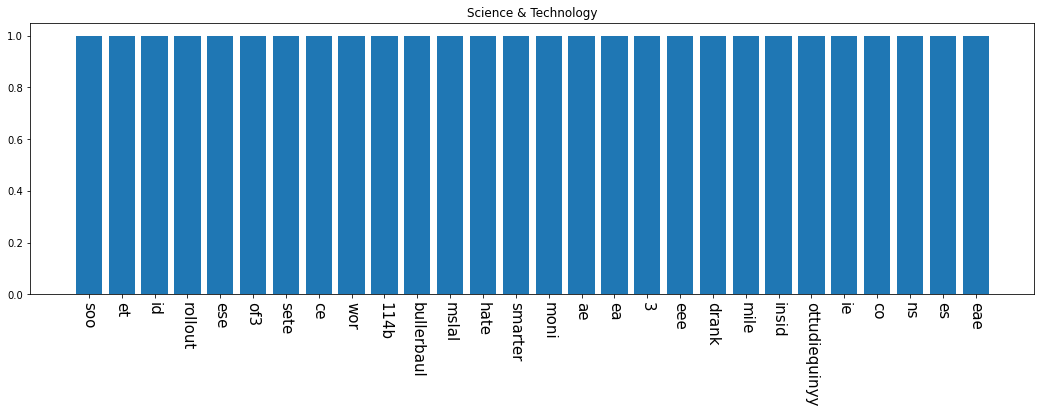

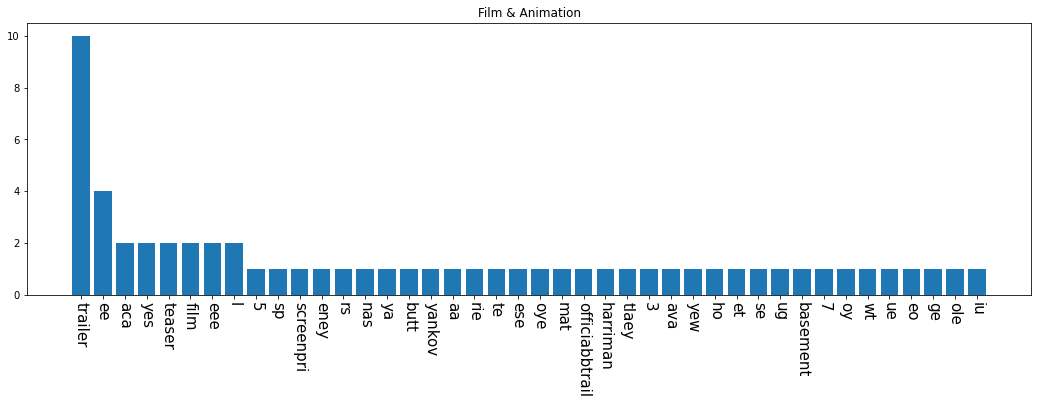

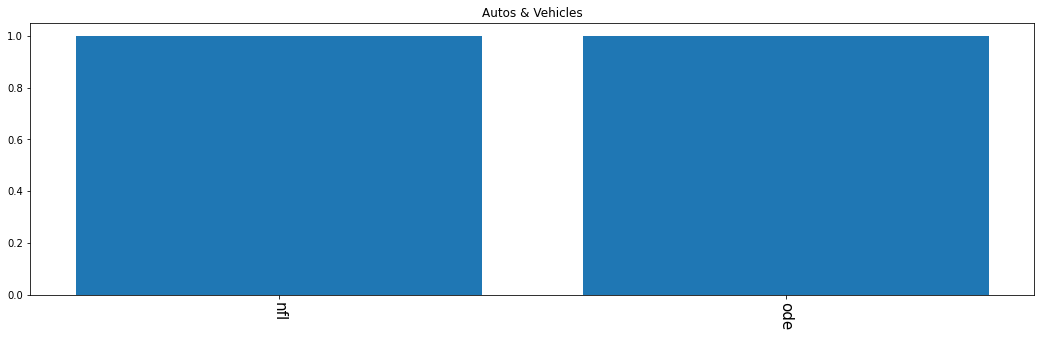

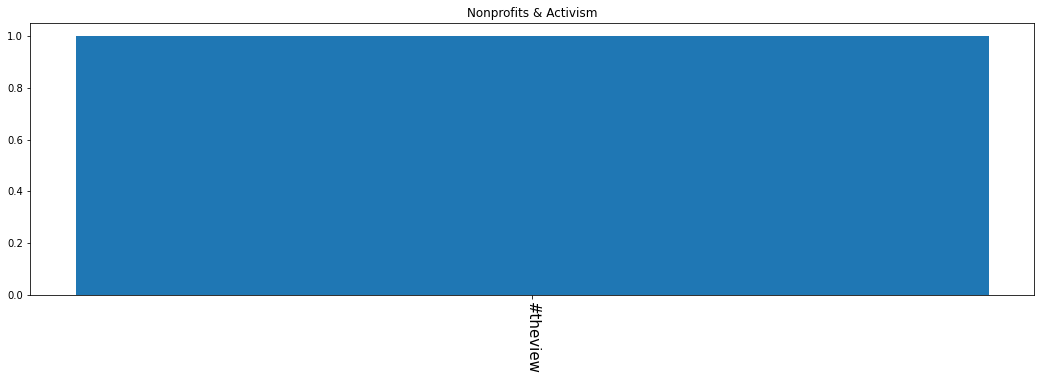

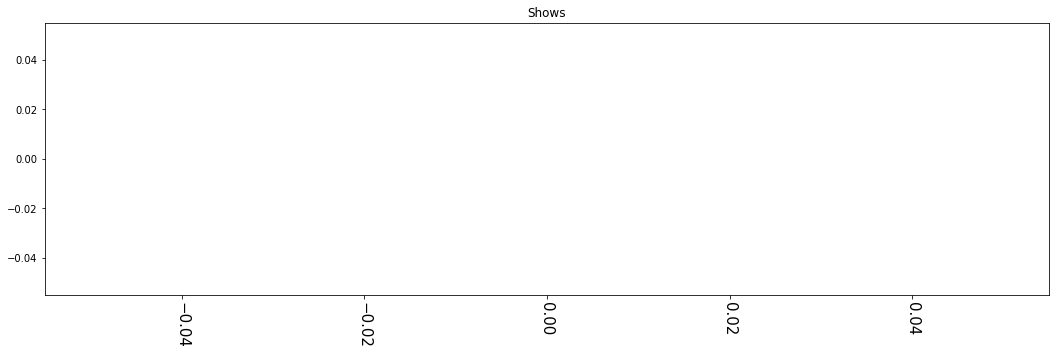

In [41]:
plot_categories_bars(categories, "ocr_text")

## Domeny

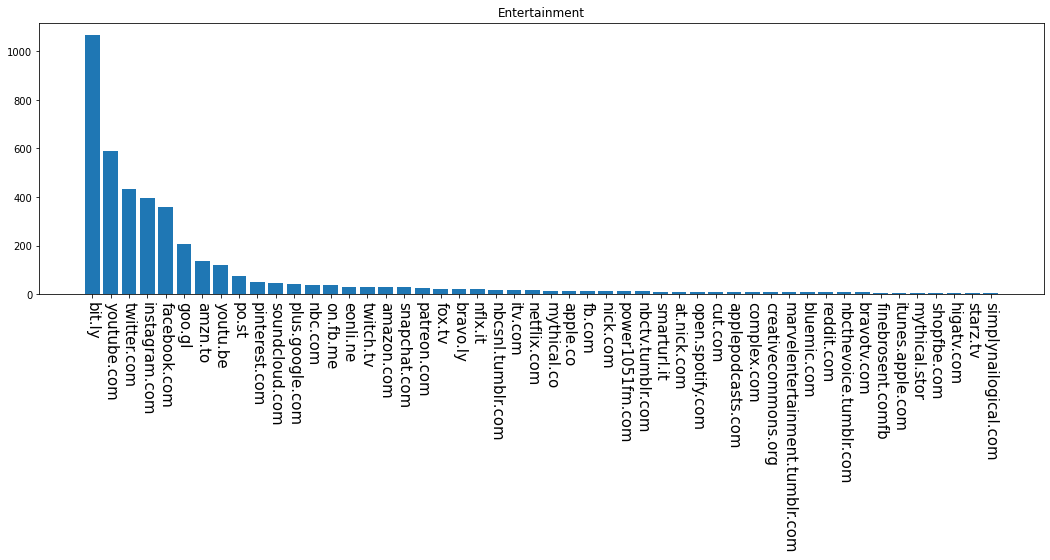

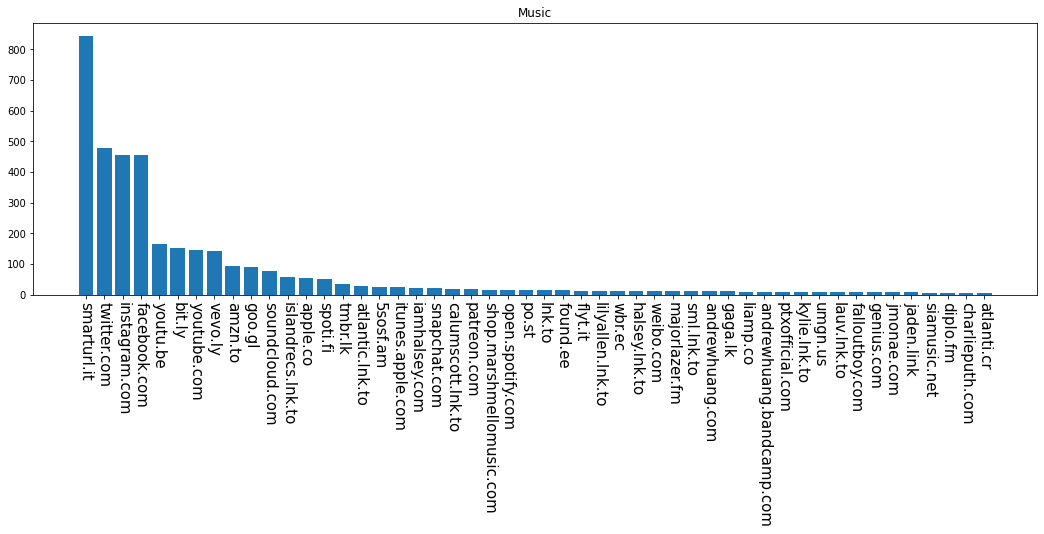

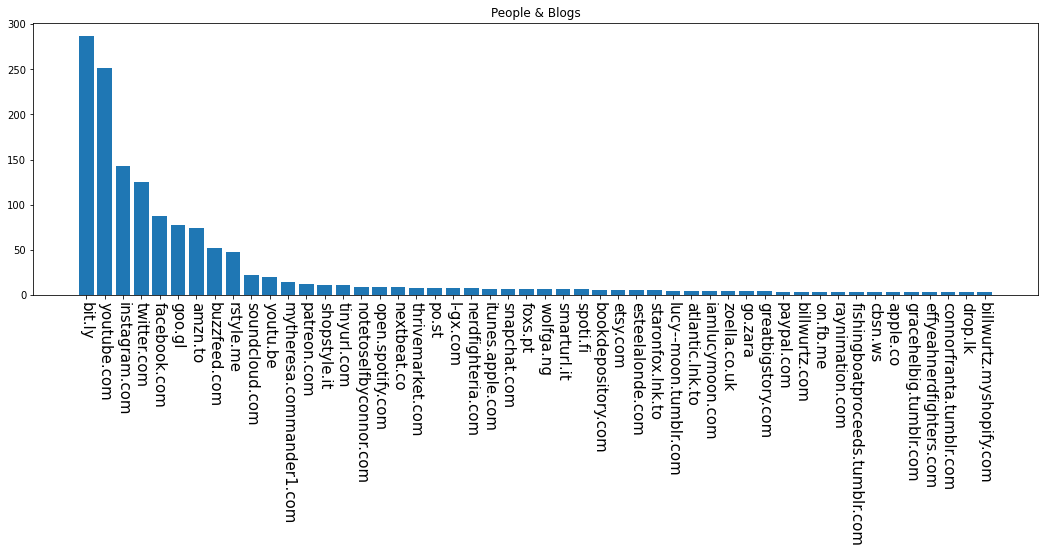

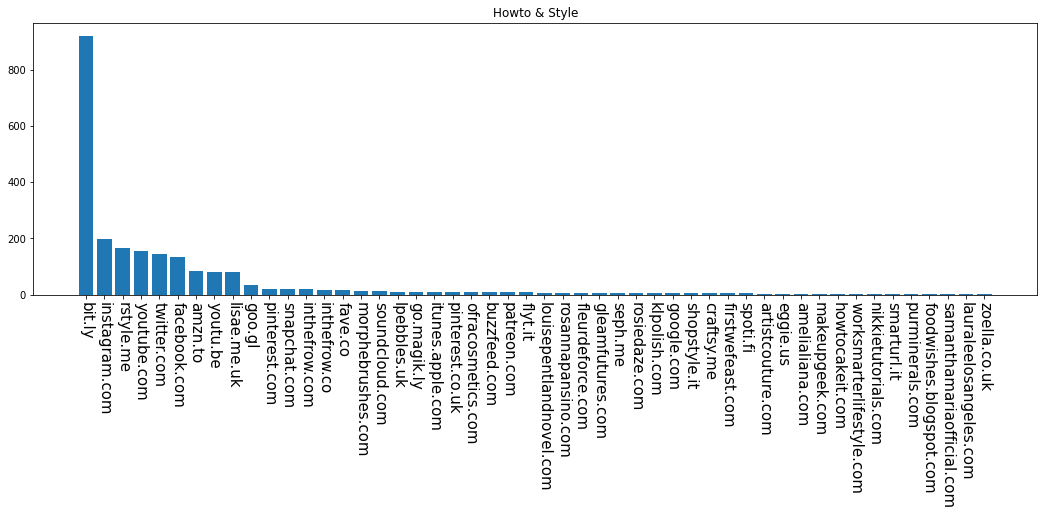

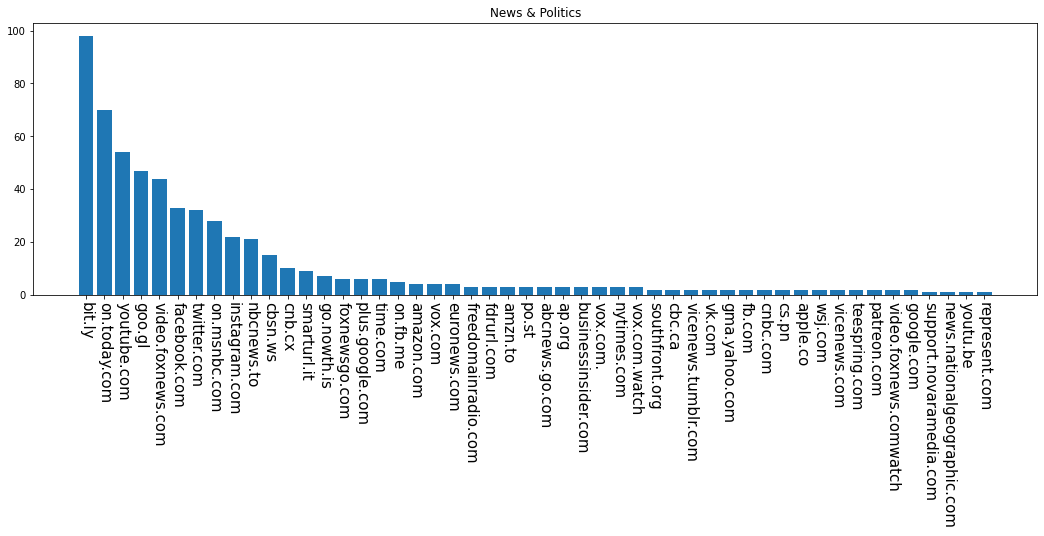

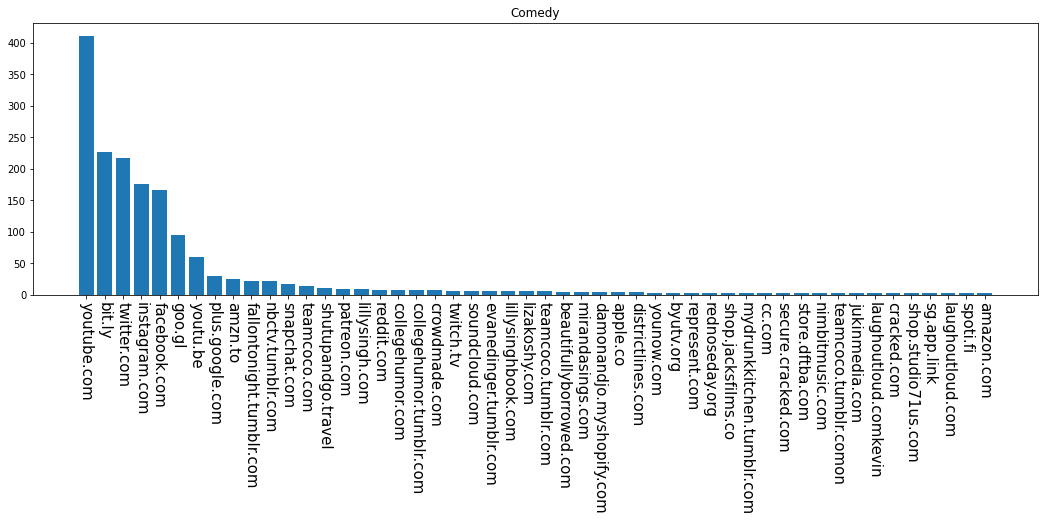

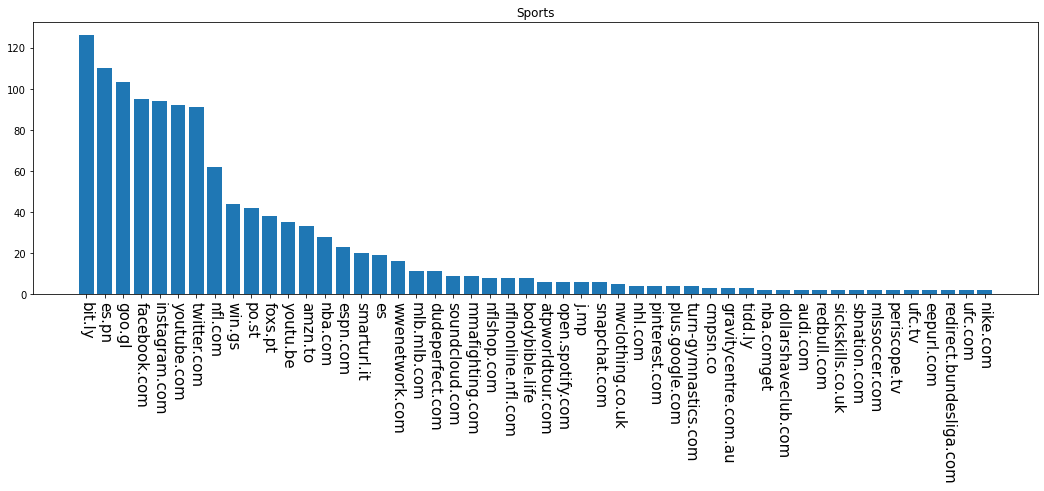

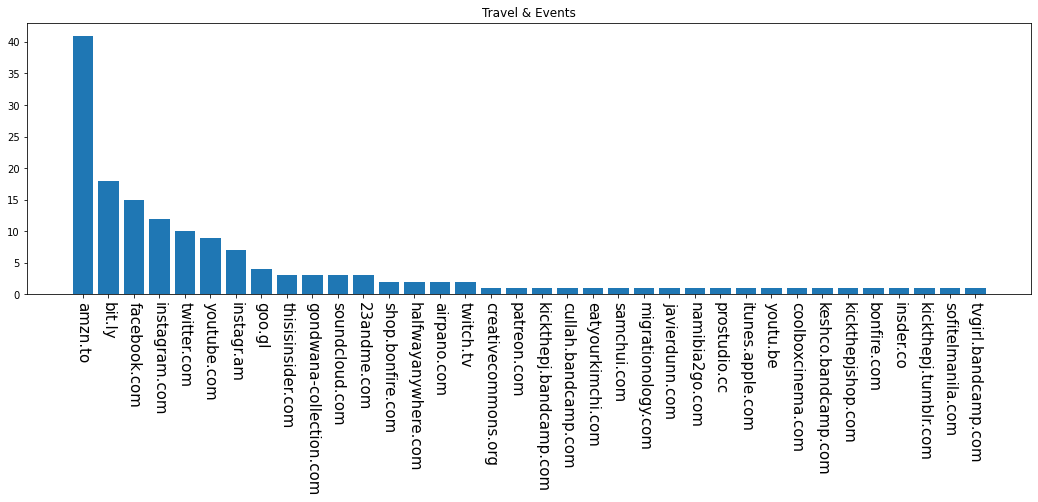

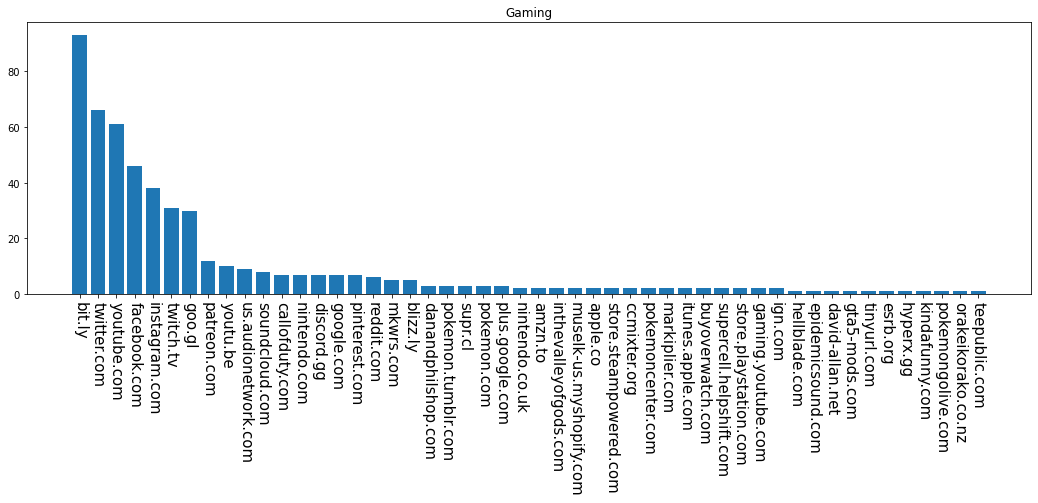

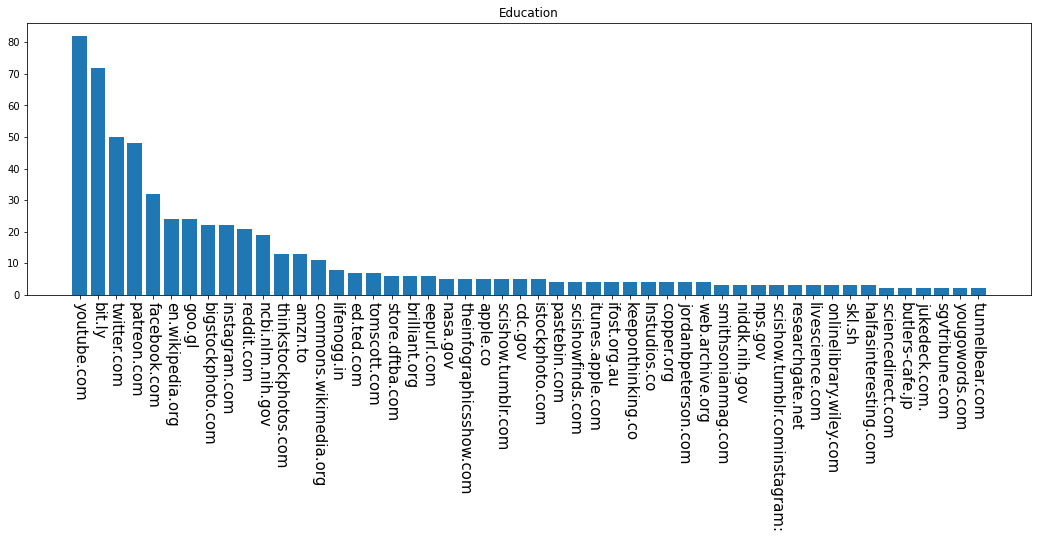

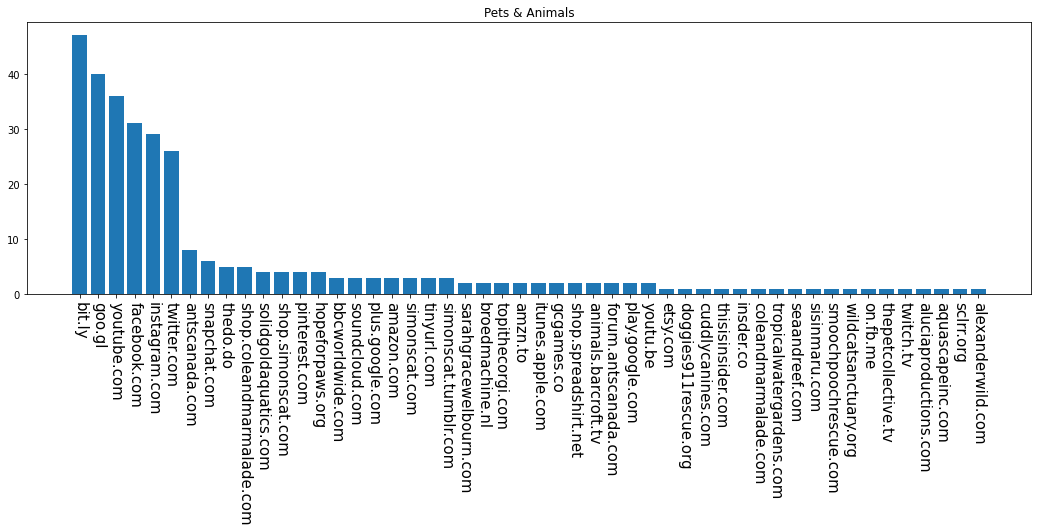

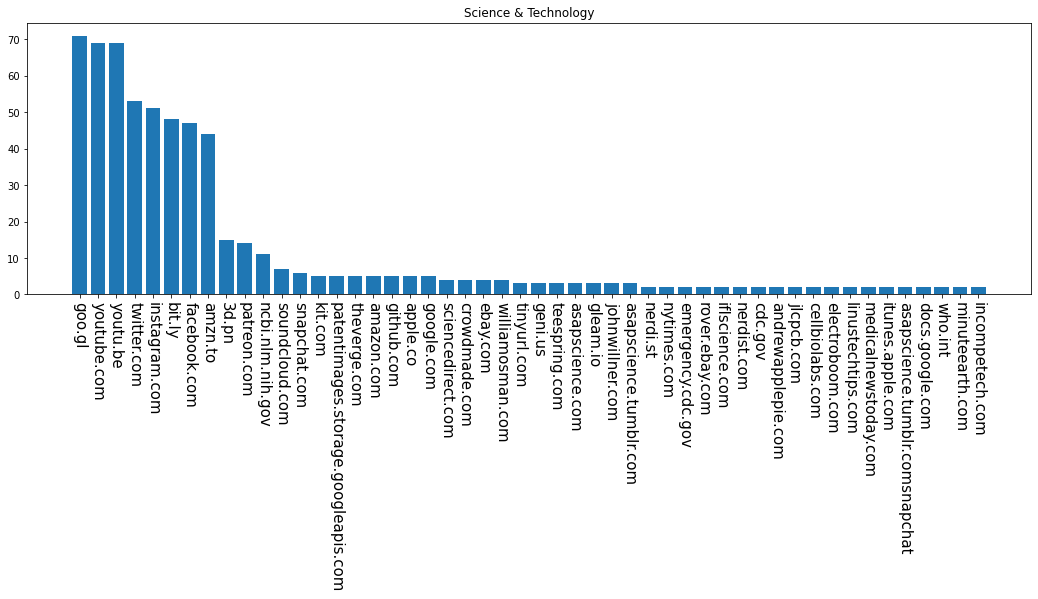

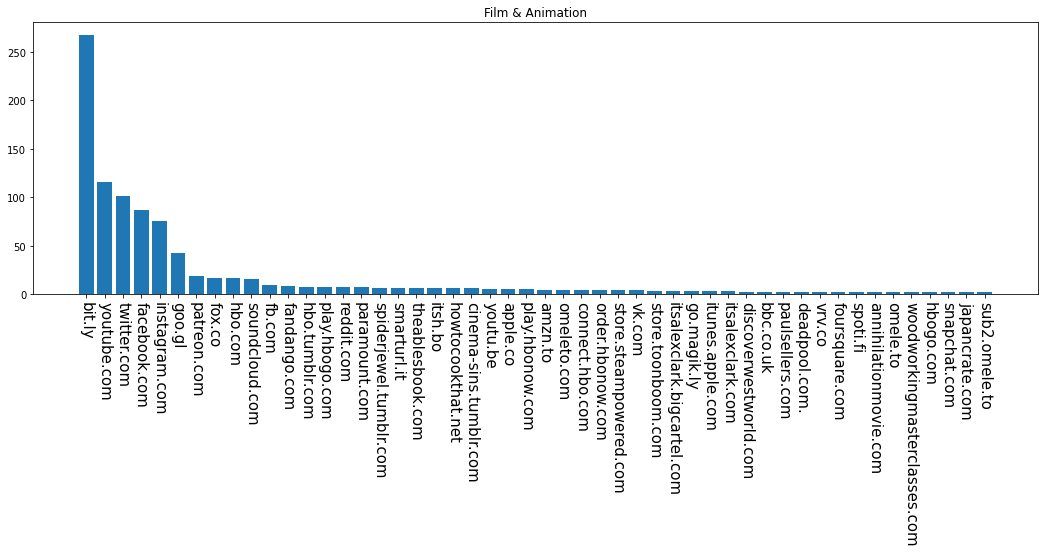

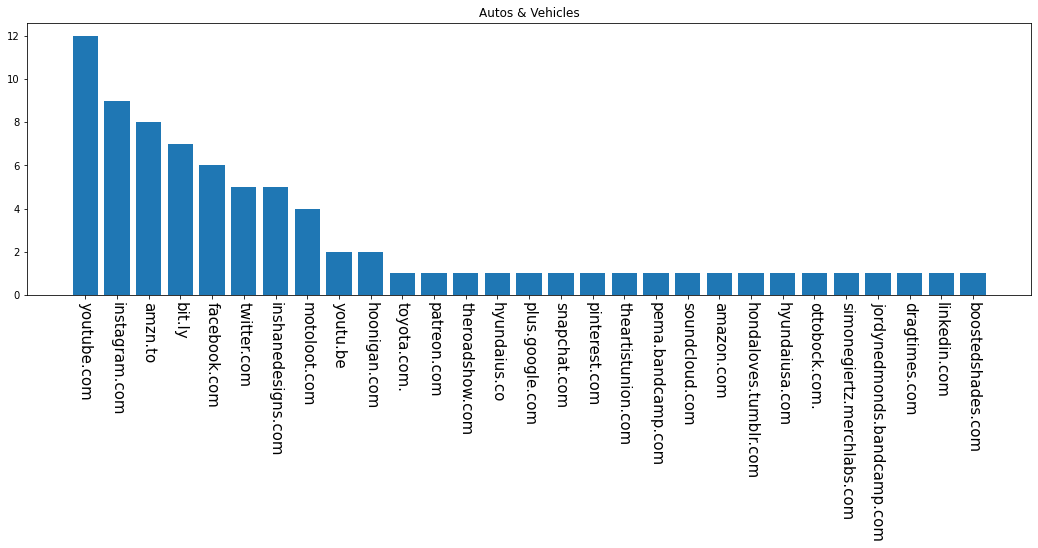

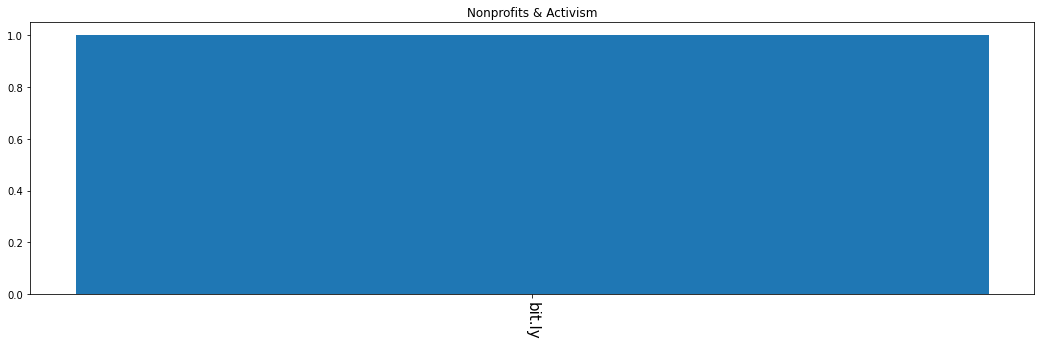

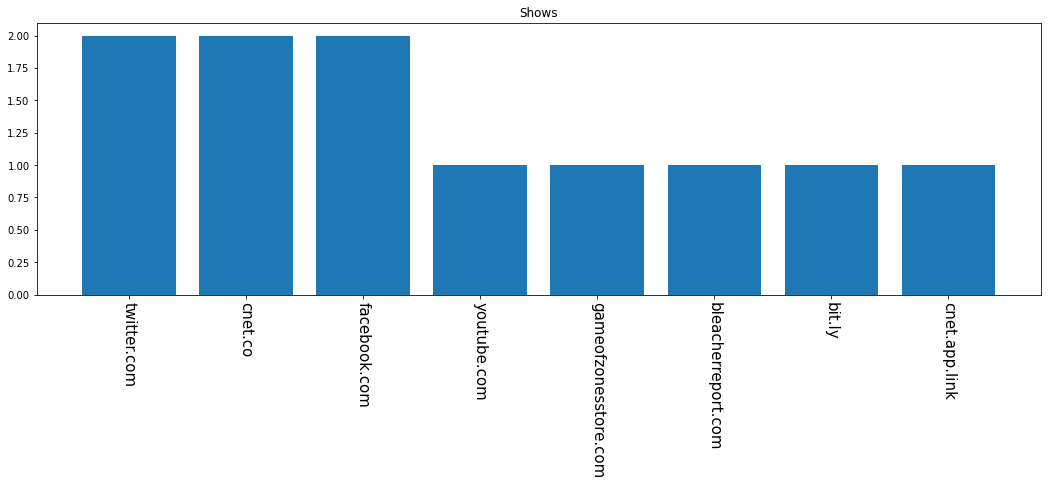

In [42]:
plot_categories_bars(categories, "domains")

## TAGI TODO

Category 'Entertainment' Attr: 'tags' unique words: 8878


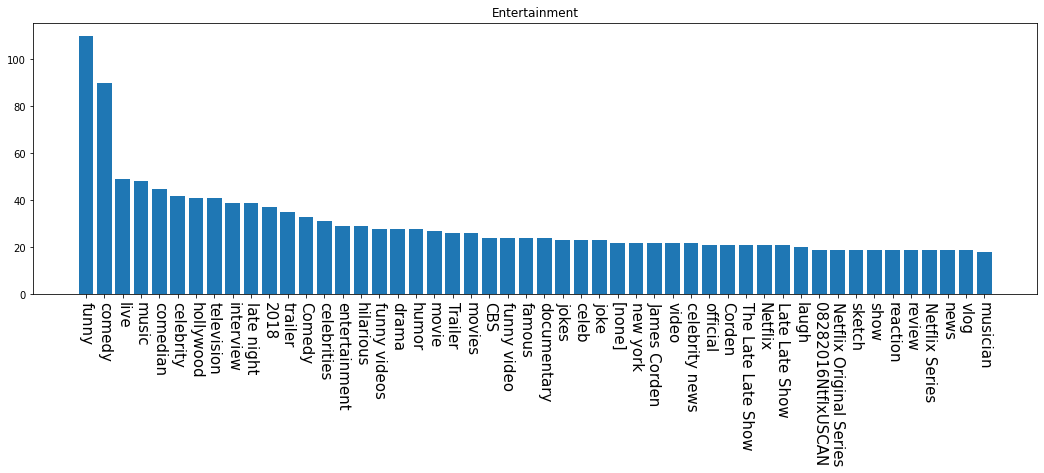

Category 'Music' Attr: 'tags' unique words: 6116


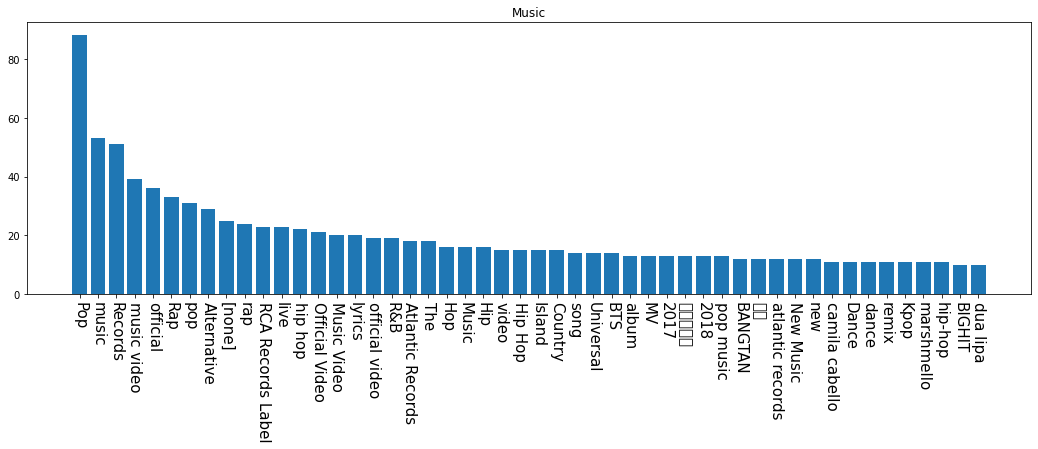

Category 'People & Blogs' Attr: 'tags' unique words: 2774


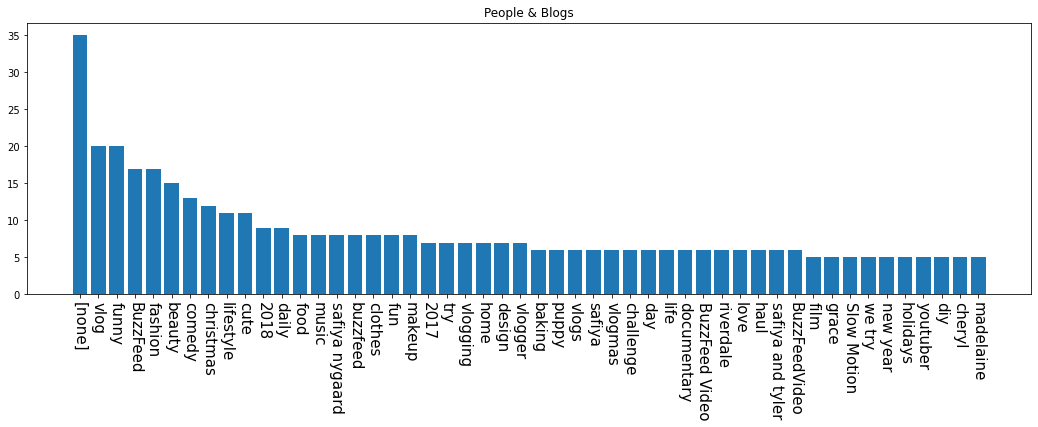

Category 'Howto & Style' Attr: 'tags' unique words: 3137


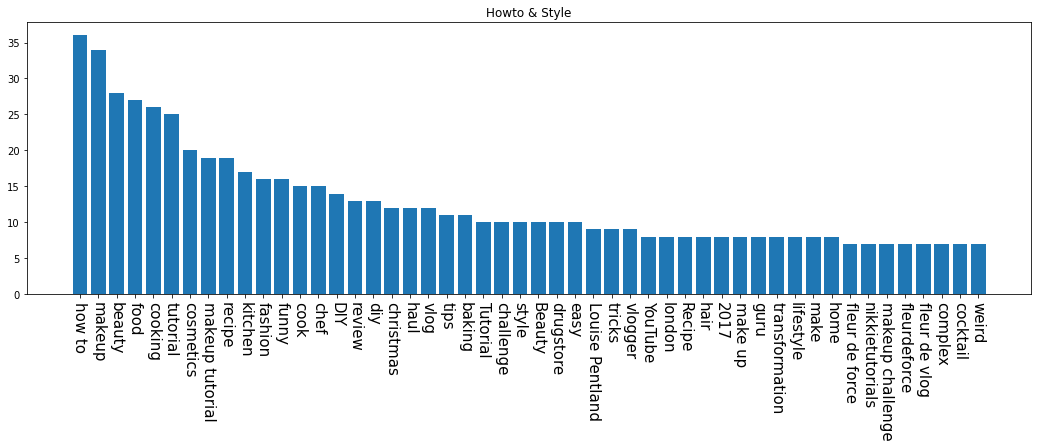

Category 'News & Politics' Attr: 'tags' unique words: 1706


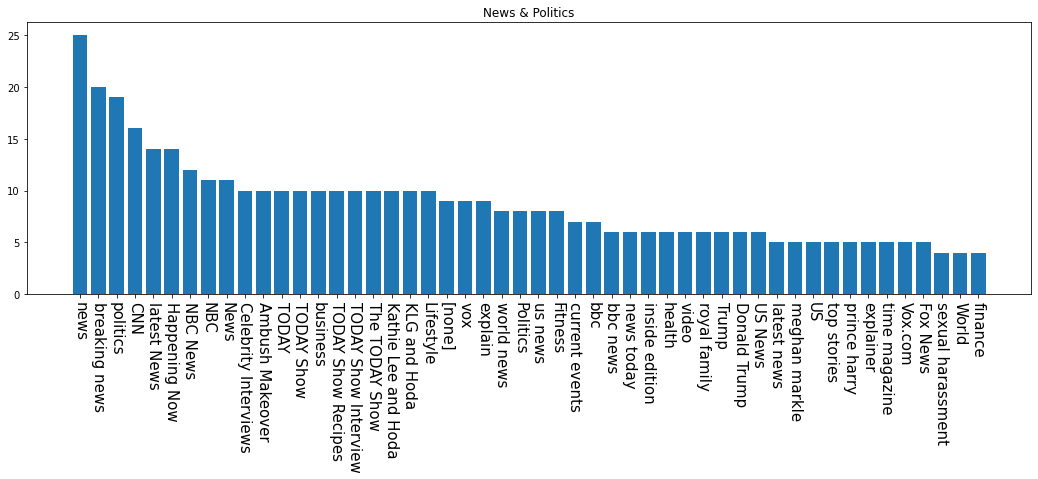

Category 'Comedy' Attr: 'tags' unique words: 2816


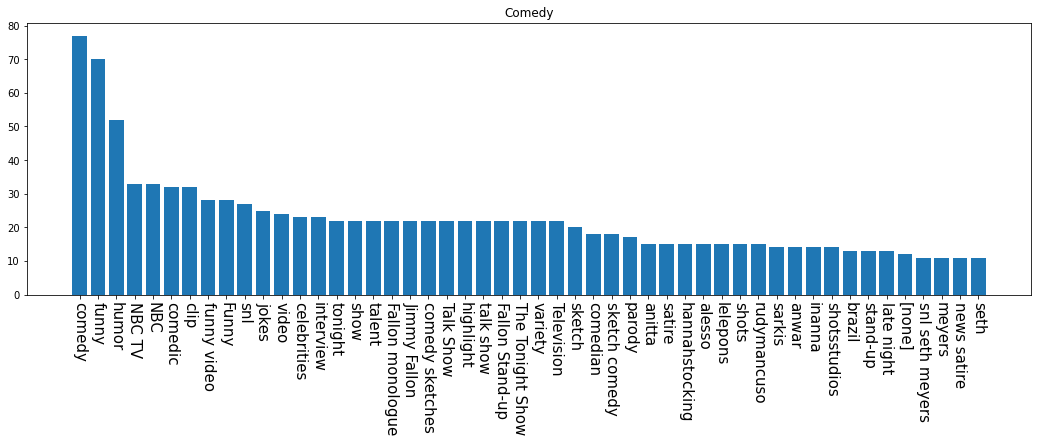

Category 'Sports' Attr: 'tags' unique words: 2749


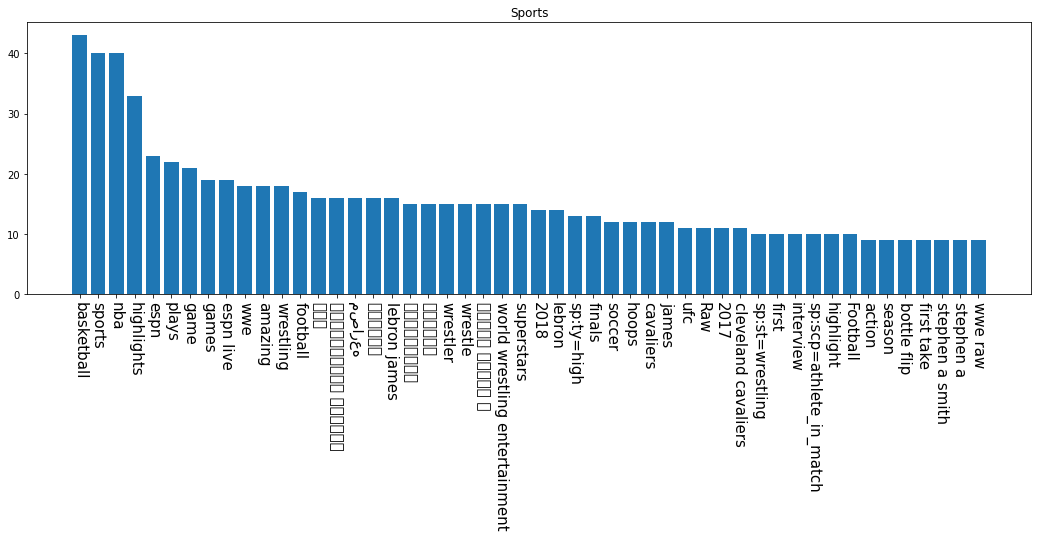

Category 'Travel & Events' Attr: 'tags' unique words: 344


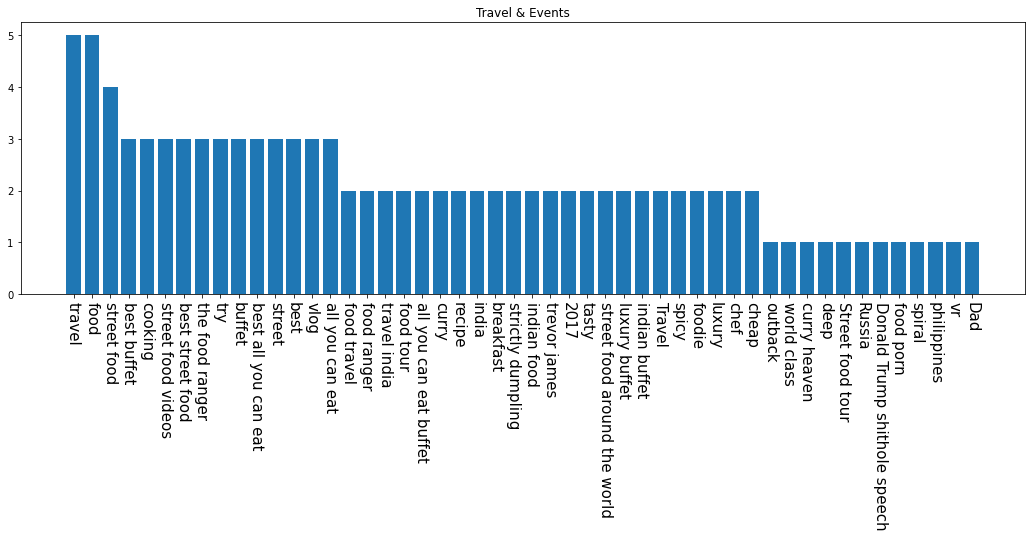

Category 'Gaming' Attr: 'tags' unique words: 1546


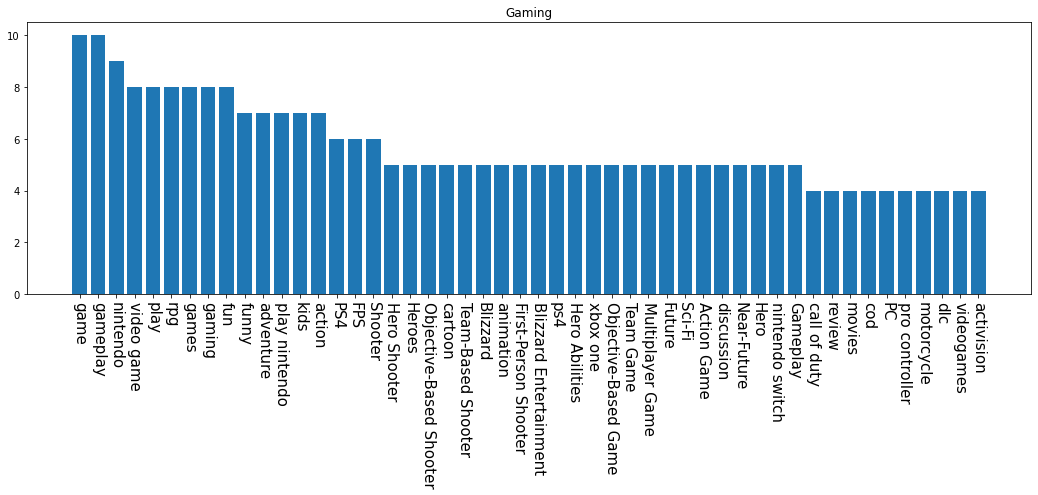

Category 'Education' Attr: 'tags' unique words: 1235


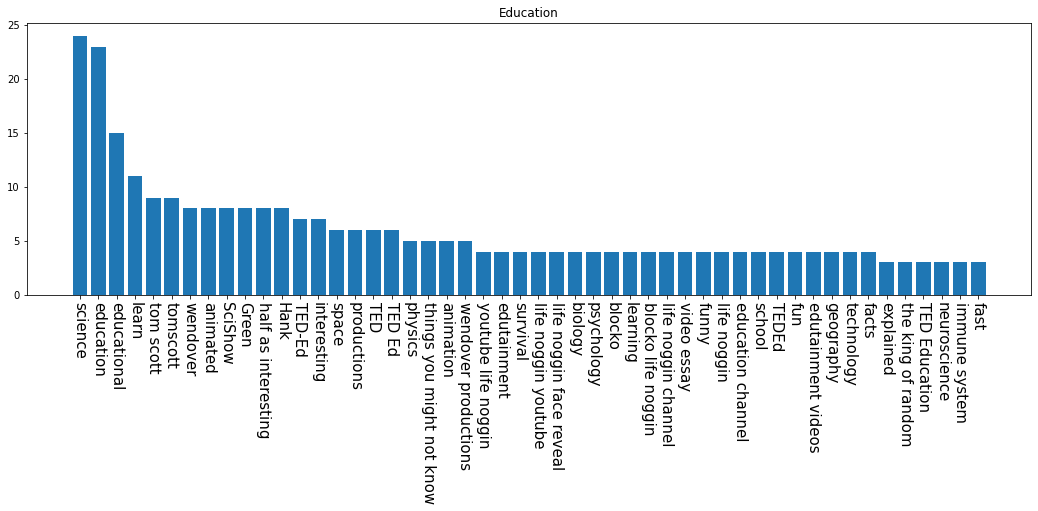

Category 'Pets & Animals' Attr: 'tags' unique words: 793


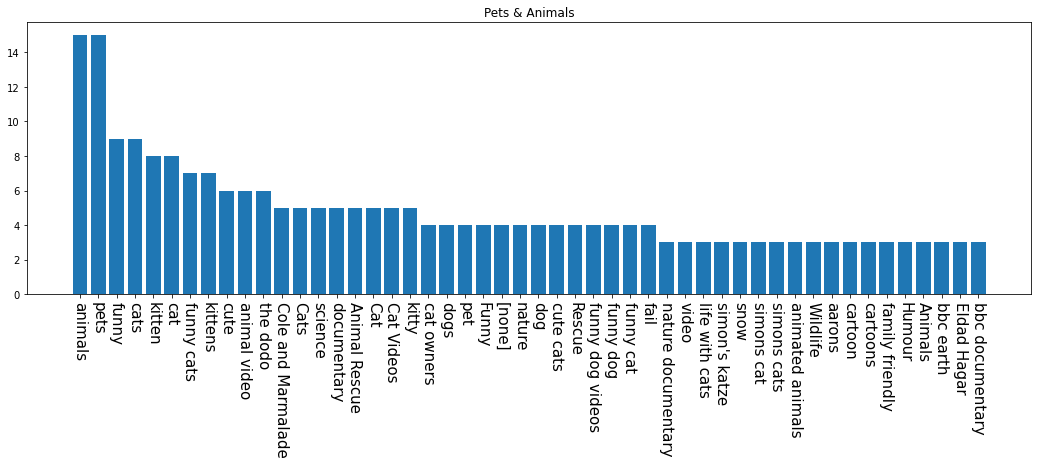

Category 'Science & Technology' Attr: 'tags' unique words: 1340


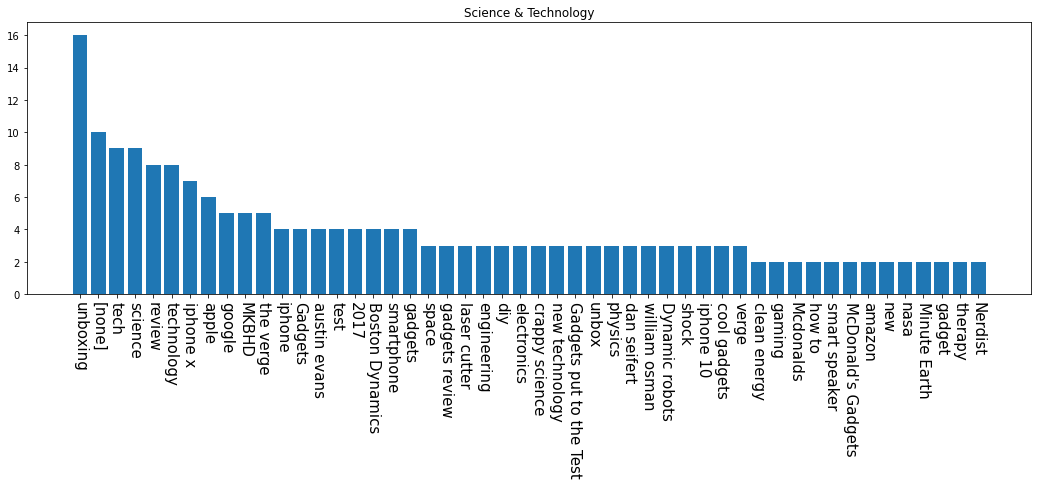

Category 'Film & Animation' Attr: 'tags' unique words: 2178


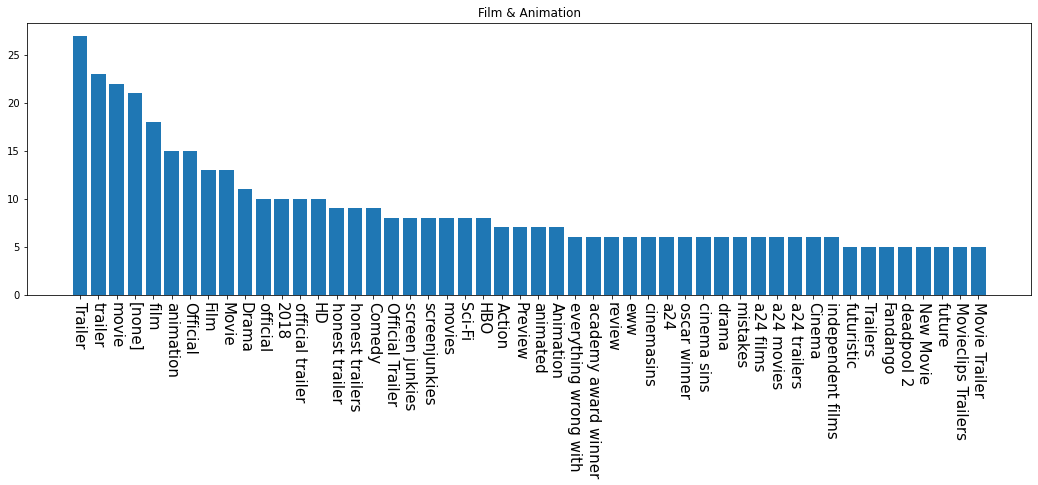

Category 'Autos & Vehicles' Attr: 'tags' unique words: 273


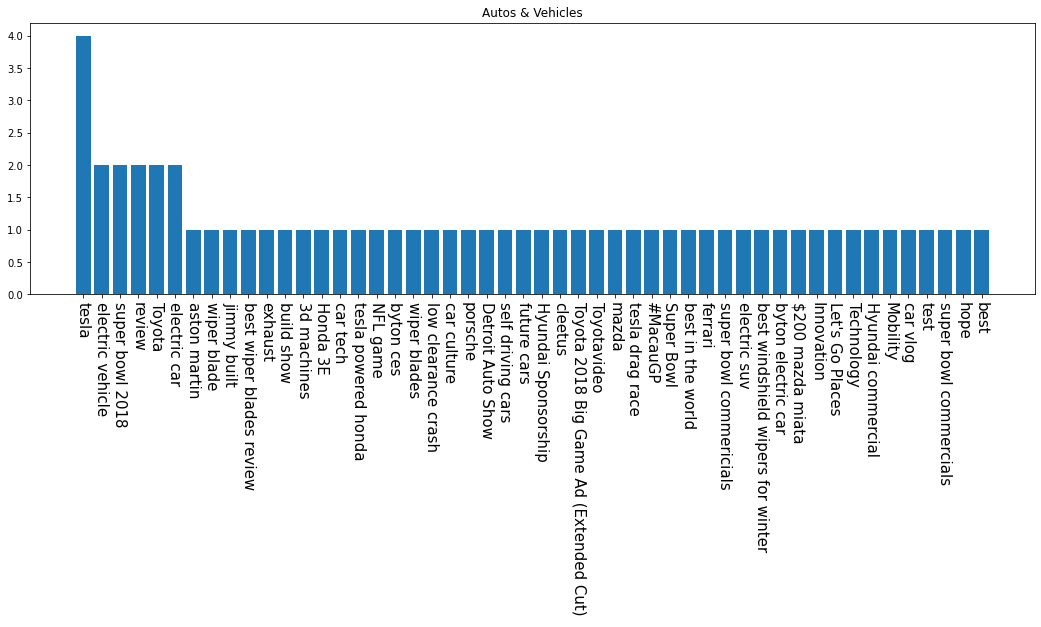

Category 'Nonprofits & Activism' Attr: 'tags' unique words: 88


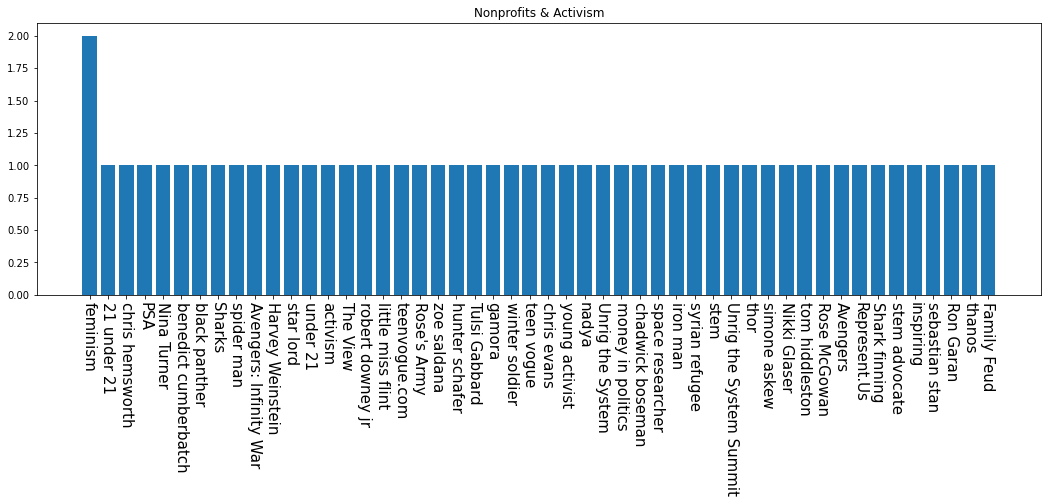

Category 'Shows' Attr: 'tags' unique words: 73


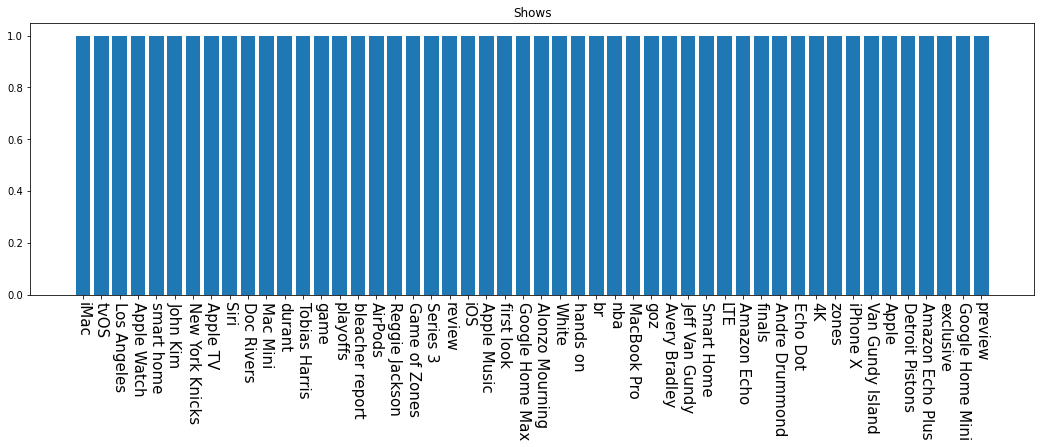

In [62]:
videos["tokenized_tags"] = videos["tags"].apply(lambda x: eval(x)[-1].split("|") if eval(x) else np.nan )
plot_categories_bars(categories, "tags")

## Emocje TODO

In [64]:
videos.columns

Index(['new_video_id', 'Unnamed: 0.1', 'video_id', 'trending_date', 'title',
       'channel_title', 'category_id', 'publish_time', 'tags', 'views',
       'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'movie_domains_count', 'description_len', 'title_len',
       'channel_title_len', 'trending_date_day_of_week',
       'publish_time_day_of_week', 'publish_time_hour_of_day', 'count',
       'new_category_id', 'tokenized_channel_titles', 'tokenized_descriptions',
       'tokenized_ocr_text', 'tokenized_titles', 'tokenized_domains',
       'category_name', 'tags_tokenized', 'tokenized_tags'],
      dtype='object')